In [1]:
using DiffEqFlux, DifferentialEquations, Plots, DelimitedFiles, PGFPlotsX
pgfplotsx()

Plots.PGFPlotsXBackend()

In [2]:
N = 10^7
dat = readdlm("covid.txt",',');
time_i = dat[:,1]; # times
Infected = 50*dat[:,2]/N; # Normalize data
Infected[2:end] = Infected[2:end];
A = Infected;

tshort_inds = (Int.(time_i)*10).+1
tshort = Int.(time_i).+1;

In [43]:
#tsteps = range(tspan[1], tspan[2], length = datasize)
tspan = (0.0, maximum(time_i))
tsteps = time_i
#=
function trueODEfunc(du, u, p, t)
    true_A = [-0.1 2.0; -2.0 -0.1]
    du .= ((u.^3)'true_A)'
end

prob_trueode = ODEProblem(trueODEfunc, u0, tspan)
ode_data = Array(solve(prob_trueode, Tsit5(), saveat = tsteps))
ode_data = ode_data[1,:]
=#
ode_data = Infected
u0 = Float32[0.0; 0.0; 0.0; 0.0]


dudt2 = FastChain(FastDense(4, 100, relu),
                FastDense(100, 50, relu),
                FastDense(50, 4))
prob_neuralode = NeuralODE(dudt2, tspan, Vern7(), saveat = tsteps, abstol=1e-6, reltol=1e-6)

function predict_neuralode(p)
  Array(prob_neuralode(u0, p))
end

function loss_neuralode(p)
    global tsteps
    pred = predict_neuralode(p)
    k = size(pred,2)
    t_loc = Int.(tsteps[tsteps .<= k] .+1)
    #lloss = sum(abs2, (ode_data[1:size(pred,2)] .- pred[1,:]))
    loss = sum(abs2, (ode_data[1:length(t_loc)] .- pred[1,t_loc]))
    return loss, pred
end

iter = 0
losses = zeros(1050)
callback = function (p, l, pred; doplot = false)
  global iter
  global tsteps
  iter += 1
  im_name = "results_sixth_interval.png"
  display(iter)
  display(l)
  losses[iter] = l
  if doplot
    # plot current prediction against data
    k = size(pred,2)
    t_local = tsteps[tsteps .<= k]
    plt = scatter(t_local, ode_data[1:length(t_local)], 
            label = "Data", 
            ylabel="Infected/N",
            xlabel="t",
            legend=:topleft, 
            size=(500,400),
            dpi=1000,
            xtickfont=font(18),
            ytickfont=font(18),
            yguidefontsize=18,
            xguidefontsize=18,
            legendfontsize=16,
            titlefontsize=18)
    scatter!(plt, 0:k-1, pred[1,:], label = "Neural ODE")
    display(plot(plt))
    savefig(im_name)
  end
  return false
end

#49 (generic function with 1 method)

In [19]:
t4 = 60.0
prob_neuralode = NeuralODE(dudt2, (0.0,t4), Tsit5(), saveat = 0:t4)
result_neuralode5 = DiffEqFlux.sciml_train(loss_neuralode,
                                           #result_neuralode5.u,
                                           prob_neuralode.p,
                                           ADAM(), 
                                           maxiters = 1010,
                                           cb = callback)

1

0.0035319153750000003

2

40768.52700655315

3

233.44504186772494

4

0.6780577644533599

5

0.06601415312472361

6

0.9366121910457121

7

4.244673366156928

8

9.059603190964753

9

13.389992662950345

10

15.493155236756822

11

14.644233644341252

12

10.914406658027389

13

5.890429226726374

14

1.7918777900174896

15

0.9867130332227472

16

1.3904833643214713

17

0.8193109678749148

18

0.24025021305217625

19

0.04003278197949983

20

0.03923999537188275

21

0.04758813335917057

22

0.04524973367955393

23

0.03832820789677699

24

0.03130382121631419

25

0.025711161958776957

26

0.021786530251825618

27

0.019317929065981822

28

0.017765687282102302

29

0.015583042481913363

30

0.013211344020831656

31

0.011539351604794018

32

0.010432191038150828

33

0.009501222581021672

34

0.008872238566513755

35

0.008436992442554749

36

0.008102812323270394

37

0.007827509180665241

38

0.007637579903718875

39

0.007459193418917986

40

0.007310709464926592

41

0.00719297636814736

42

0.007089013944184109

43

0.007002484316394413

44

0.006933511195563195

45

0.0068756261705367775

46

0.006807085792112772

47

0.006738613159103611

48

0.006688542041626362

49

0.0066347403429067135

50

0.006564685959845398

51

0.006508751941841521

52

0.006455288564426212

53

0.006385164055968572

54

0.0063224608714773515

55

0.006255744257079932

56

0.006182643922113325

57

0.0061305258038995905

58

0.006041439784735396

59

0.005988452703761867

60

0.005902029510076029

61

0.0058519754629763505

62

0.005789320905016069

63

0.005715315602293382

64

0.005652004598361907

65

0.0055857708022572835

66

0.005510978353299013

67

0.005456585460747228

68

0.0053891020247662045

69

0.005332623829933147

70

0.005280282701073375

71

0.005228654947146657

72

0.0051629006354390414

73

0.005107231626955616

74

0.005056379312165005

75

0.005000921577865518

76

0.004960480936103151

77

0.004896629919884595

78

0.004843892520724501

79

0.00478747291631298

80

0.004758300417776286

81

0.004707995541658089

82

0.004658384767263297

83

0.004611140180429697

84

0.0045668859134727745

85

0.004517715334047285

86

0.0044834013953646695

87

0.0044393536634820315

88

0.004395035418024109

89

0.004345972423066797

90

0.004313845413763047

91

0.004272538342896783

92

0.0042385172852106206

93

0.004196070614998129

94

0.00416501962135603

95

0.004121938882995774

96

0.004086152792029549

97

0.004044397398625407

98

0.004008739251468425

99

0.003977125882745397

100

0.003938214689621116

101

0.003903040097291813

102

0.00386234037227039

103

0.00382263464325591

104

0.003777853853136141

105

0.0037300661546424657

106

0.0036823274653684747

107

0.0036301143818941286

108

0.0035714425268719026

109

0.0035091565093809713

110

0.0034531499212929716

111

0.0033964400568951016

112

0.0033315063171220384

113

0.003258577738985164

114

0.0031922920725976638

115

0.0031160387673504317

116

0.0030422945056740084

117

0.0029652145751724725

118

0.0028903217409919496

119

0.0028142977769554946

120

0.0027438304335829747

121

0.0026716336509547303

122

0.0026047570941188074

123

0.002543273607609493

124

0.0024702276547483794

125

0.0024136559315323224

126

0.0023556601021985884

127

0.002294916362541807

128

0.0022410827948613357

129

0.0021831286552782166

130

0.0021337665080457865

131

0.002085742564077468

132

0.002038575351935725

133

0.0019856657017464033

134

0.0019383026735136498

135

0.001901608414706192

136

0.0018547555284343323

137

0.0018158805843307548

138

0.0017740069228102335

139

0.001735294724273067

140

0.001688961234413622

141

0.0016622727717549325

142

0.0016277394741294675

143

0.001586902434031932

144

0.0015610989870124372

145

0.0015208988626326204

146

0.0014893037498733283

147

0.0014595363595602904

148

0.0014315776278585927

149

0.0013990890928757258

150

0.0013753433605224615

151

0.0013450144323540452

152

0.0013156617788864758

153

0.0012949703462206883

154

0.0012682648951088831

155

0.0012447432029515928

156

0.0012222723200932654

157

0.0011944167596967359

158

0.0011754154660690353

159

0.0011540087785390657

160

0.001130872725598248

161

0.0011074367742454146

162

0.0010900344068151139

163

0.0010688323986575115

164

0.0010495685533757446

165

0.0010308005700430316

166

0.0010122394196861175

167

0.0009936736820153626

168

0.0009786774200015165

169

0.0009605228707165246

170

0.0009420267213533111

171

0.000928051691835791

172

0.0009107483454022127

173

0.0008952798130062829

174

0.000880300449337414

175

0.0008647097288980033

176

0.0008517219897219823

177

0.0008371506439929183

178

0.0008233452174291219

179

0.0008092452110046509

180

0.0007975920448236604

181

0.0007840007600119654

182

0.0007705453871799386

183

0.0007593018358927353

184

0.0007498273101669978

185

0.0007366687205741373

186

0.0007252470968810825

187

0.0007153038125041666

188

0.000703985824263647

189

0.0006928740399694964

190

0.0006825596672250455

191

0.0006719729460256957

192

0.0006622156833994935

193

0.0006520194731214561

194

0.0006419899719662496

195

0.0006331305654768686

196

0.0006240937912865578

197

0.0006148131821721592

198

0.0006059166340813257

199

0.0005970941282686568

200

0.0005886634666415996

201

0.0005804424457562165

202

0.0005720565255138094

203

0.0005651026753571648

204

0.0005573148509087339

205

0.000549292879988437

206

0.0005426932332782649

207

0.000534874113392215

208

0.0005281216947508076

209

0.0005205547138153689

210

0.0005130700159579803

211

0.0005071114489372165

212

0.0005012505889417563

213

0.0004950601175090846

214

0.0004891408934103389

215

0.0004824523954990156

216

0.0004764351045352686

217

0.0004714567186621842

218

0.0004652902521959078

219

0.0004593254507554097

220

0.00045214038962390553

221

0.00044619554062323144

222

0.0004367554129574106

223

0.0004302884422869394

224

0.0004233990024527201

225

0.00041655773193745505

226

0.00040988584691099736

227

0.0004056751317755935

228

0.00040011773862814657

229

0.00039565454418826113

230

0.00039190134787002917

231

0.0003875996813161435

232

0.0003850806073161691

233

0.0003799106183163579

234

0.0003739085059401382

235

0.00036973504002428754

236

0.00036399135499062607

237

0.0003597161376106552

238

0.000354003365946317

239

0.0003505821135381203

240

0.00034638551971603084

241

0.0003428432323029041

242

0.00033867517407751323

243

0.0003357946099241257

244

0.00033184093316362273

245

0.00032830189304269646

246

0.0003250833864435833

247

0.0003210891826291243

248

0.00031769145360537575

249

0.00031455385715493315

250

0.00031065567725748497

251

0.00030793903190878775

252

0.00030441310899402075

253

0.0003021123455716137

254

0.0002984078200212837

255

0.0002953920262916674

256

0.0002932242143410622

257

0.0002898871497436923

258

0.0002866922926618395

259

0.0002844271347075658

260

0.00028158380947402087

261

0.0002780815597577624

262

0.0002756633261234635

263

0.00027350023275028913

264

0.0002703019800923076

265

0.0002674598586078184

266

0.00026548854105025275

267

0.0002626713564684875

268

0.00026110035688249144

269

0.0002582432106542198

270

0.00025650893694754485

271

0.00025415160279058805

272

0.0002518559960353441

273

0.0002496114093271723

274

0.0002473932088605812

275

0.00024515792705790654

276

0.00024344924379268541

277

0.00024120192534570582

278

0.00023953749358443334

279

0.0002374835848797551

280

0.00023545539623251338

281

0.00023324824160033585

282

0.00023161240978691145

283

0.00022976958588093345

284

0.00022873137004014471

285

0.00022647408814414877

286

0.00022453522379647733

287

0.00022345330413880618

288

0.00022109940058491584

289

0.0002200190460430659

290

0.00021862817075534794

291

0.00021690711066334943

292

0.0002151265299763073

293

0.00021450762196051582

294

0.0002126417878321818

295

0.00021077354871446203

296

0.00020951771651997253

297

0.00020798162150496082

298

0.00020652708081101307

299

0.0002053393298296703

300

0.00020394799782960763

301

0.00020285866443573022

302

0.00020120282902863024

303

0.00020016376664816035

304

0.00019831276330980116

305

0.000197361259618218

306

0.00019681759893694383

307

0.0001950786532667971

308

0.0001935183531709024

309

0.00019246593059691757

310

0.0001912267271109349

311

0.0001899344697083828

312

0.00018935923878240005

313

0.0001876957114585829

314

0.00018689704815234978

315

0.00018580968465836271

316

0.00018486051548678614

317

0.0001836784917234121

318

0.00018260443403679923

319

0.00018107175140511225

320

0.0001803224325085162

321

0.0001789960968991851

322

0.000178019892556989

323

0.00017709394198663498

324

0.00017626817023670916

325

0.00017507805546219832

326

0.00017414232879931293

327

0.00017315874193990198

328

0.000171900827034895

329

0.0001712194228029654

330

0.00016992571206602693

331

0.0001694656442608591

332

0.0001684174496882524

333

0.00016768504253737335

334

0.00016640866817195851

335

0.0001657334628603125

336

0.00016508073478565922

337

0.00016372542760653024

338

0.00016323334812115667

339

0.00016244394952124377

340

0.00016149469597315504

341

0.00016067689304577565

342

0.00015987481366737432

343

0.00015892553798666412

344

0.00015818677909472766

345

0.00015686094413302405

346

0.00015659680747601764

347

0.00015582202025850764

348

0.0001547945722719549

349

0.00015424133361616004

350

0.00015341749596824492

351

0.000152666221900364

352

0.00015198059974252926

353

0.00015144329719223

354

0.00015027888371168497

355

0.0001498049602339482

356

0.00014910651850564817

357

0.00014810838909096234

358

0.0001475790685630752

359

0.0001467018632571298

360

0.00014658179570217476

361

0.00014596990493961714

362

0.00014482503248332051

363

0.00014401509432547695

364

0.00014333928153173215

365

0.00014297997653308777

366

0.00014205602854050573

367

0.00014115116373608193

368

0.00014064542549852352

369

0.00014017485221973813

370

0.0001395013654094581

371

0.00013886896811351275

372

0.00013813107017840467

373

0.00013757866628583986

374

0.00013682779795387557

375

0.00013629852548649395

376

0.0001357441756773795

377

0.0001351373633765748

378

0.00013474068900437905

379

0.00013438101868195953

380

0.0001332636273839322

381

0.00013254438812979673

382

0.00013257210052584792

383

0.00013197628734648462

384

0.00013121056705814102

385

0.00013047682891954713

386

0.0001300740721905217

387

0.00012919351767813934

388

0.00012881303405428356

389

0.00012857981224653162

390

0.00012749216373728143

391

0.00012741749019449765

392

0.00012679580204526134

393

0.00012624219195811107

394

0.00012587915352975672

395

0.00012513029763875234

396

0.00012473025020440915

397

0.00012426266102829112

398

0.00012365964391568336

399

0.0001230717055720977

400

0.00012276235273715055

401

0.00012231373878531334

402

0.00012159532039633872

403

0.00012101902468111051

404

0.0001208644885521294

405

0.00012031687505686167

406

0.00011981140005474811

407

0.00011907279812029174

408

0.0001191240777599488

409

0.0001184079643691787

410

0.00011800835976860744

411

0.00011792397695007826

412

0.00011694092126844558

413

0.00011647147913116645

414

0.00011627635980536624

415

0.00011540003517926075

416

0.00011520423182506545

417

0.00011446652111764461

418

0.00011415939463228945

419

0.00011395418394348196

420

0.00011376226507335442

421

0.00011332118881948747

422

0.00011258925525746152

423

0.00011228799150128784

424

0.00011166163455739631

425

0.00011104821517848556

426

0.00011106092300296183

427

0.00011011418432923811

428

0.00011000835771435137

429

0.00010936707766961271

430

0.0001090198649229427

431

0.00010876056937663816

432

0.00010814223262938348

433

0.00010780151546939927

434

0.0001074537426262463

435

0.0001070079193580969

436

0.0001061245655620021

437

0.00010563318247526834

438

0.00010561465050596363

439

0.0001051513403064666

440

0.00010499729913476921

441

0.00010425302180281279

442

0.00010438249290667047

443

0.00010387355013412769

444

0.00010313791957444937

445

0.00010263981684179123

446

0.00010204446966306831

447

0.00010168391209848125

448

0.00010174677028827405

449

0.0001011166584006249

450

0.00010112447908779318

451

0.00010012039801134366

452

9.989081828307778e-5

453

9.931330185986801e-5

454

9.907510815065287e-5

455

9.86996332846105e-5

456

9.807457405166681e-5

457

9.741670857256398e-5

458

9.799186893159766e-5

459

9.700260241039802e-5

460

9.667157311778596e-5

461

9.659701075451999e-5

462

9.592788589753876e-5

463

9.517701922691955e-5

464

9.49646256391647e-5

465

9.455797446177144e-5

466

9.448265983904998e-5

467

9.411513747945851e-5

468

9.376615551549872e-5

469

9.345037323206179e-5

470

9.270925200067725e-5

471

9.262313954423444e-5

472

9.234022854762185e-5

473

9.173856702897763e-5

474

9.100396156116982e-5

475

9.09806841131893e-5

476

9.083406088244925e-5

477

9.008391017098095e-5

478

8.976139981525585e-5

479

8.936404782674534e-5

480

8.935788578697852e-5

481

8.935033184539044e-5

482

8.850046739057347e-5

483

8.774632479285468e-5

484

8.71025072146299e-5

485

8.723483811135679e-5

486

8.659679206063317e-5

487

8.606681870110735e-5

488

8.591892053329475e-5

489

8.526851721220752e-5

490

8.526934299035222e-5

491

8.45786549877745e-5

492

8.437566380810224e-5

493

8.424318196625395e-5

494

8.3480802135235e-5

495

8.20703440432944e-5

496

8.306659253604767e-5

497

8.268564989349609e-5

498

8.235585577197089e-5

499

8.213403197866232e-5

500

8.173836957650789e-5

501

8.12711512370704e-5

502

8.119444930730719e-5

503

8.044886198310585e-5

504

8.029949189842679e-5

505

8.006589392585749e-5

506

7.9334338426188e-5

507

7.917323052669006e-5

508

7.863554209852951e-5

509

7.833102736002273e-5

510

7.798553685627618e-5

511

7.77841462833995e-5

512

7.708708081412159e-5

513

7.67360833458726e-5

514

7.667120103527088e-5

515

7.62703795373431e-5

516

7.606032229331794e-5

517

7.457725775987997e-5

518

7.527596094839223e-5

519

7.505695106728324e-5

520

7.37773493856771e-5

521

7.424459822831377e-5

522

7.32129587866144e-5

523

7.356921406892254e-5

524

7.358510546010195e-5

525

7.299079726980708e-5

526

7.278629458047616e-5

527

7.219975658931467e-5

528

7.210315953875234e-5

529

7.201180963441737e-5

530

7.147723650303227e-5

531

7.16164010692434e-5

532

7.11324959913193e-5

533

7.109520885397648e-5

534

7.069844689706439e-5

535

7.011410467423319e-5

536

7.001212614992356e-5

537

6.9584252695828e-5

538

6.922475388048508e-5

539

6.8021265612174e-5

540

6.851265741495349e-5

541

6.895298994742521e-5

542

6.818041118672813e-5

543

6.77766609633023e-5

544

6.785820809273591e-5

545

6.695113614037422e-5

546

6.750195672842764e-5

547

6.560260601573307e-5

548

6.525545858128415e-5

549

6.631834408372417e-5

550

6.619612320570202e-5

551

6.601998921470305e-5

552

6.589360434870715e-5

553

6.540991155955493e-5

554

6.418011149128334e-5

555

6.486001962124072e-5

556

6.44432814083817e-5

557

6.416732173927738e-5

558

6.392442008845589e-5

559

6.398381850016555e-5

560

6.258637890101895e-5

561

6.314792540128733e-5

562

6.357239609429805e-5

563

6.284903715066372e-5

564

6.226645265456404e-5

565

6.263366043814228e-5

566

6.228481221970389e-5

567

6.158140150291924e-5

568

6.168472753328763e-5

569

6.189999172280598e-5

570

6.148955890278773e-5

571

6.116017502625962e-5

572

6.14201092318631e-5

573

6.021979158588889e-5

574

6.0415304784796065e-5

575

6.001541656431372e-5

576

5.967988913086438e-5

577

5.951325382754867e-5

578

5.950269904656613e-5

579

5.886154338808624e-5

580

5.9310270710836966e-5

581

5.7802997811337895e-5

582

5.8941965515662433e-5

583

5.784174482658088e-5

584

5.880266718511558e-5

585

5.776637285554643e-5

586

5.7781994536728214e-5

587

5.76115887410553e-5

588

5.7859946269512715e-5

589

5.7573281974305503e-5

590

5.696449194964488e-5

591

5.6476779294852796e-5

592

5.6792938579167784e-5

593

5.62687381993758e-5

594

5.6708571658975683e-5

595

5.531614712931416e-5

596

5.564575372319791e-5

597

5.577976144504994e-5

598

5.5851880249509904e-5

599

5.617962677962031e-5

600

5.5681212825292414e-5

601

5.51591163101325e-5

602

5.367029145572224e-5

603

5.495444542418389e-5

604

5.487786138301845e-5

605

5.47902069320998e-5

606

5.3931801741837256e-5

607

5.389082333624267e-5

608

5.4029402194719336e-5

609

5.37246758834624e-5

610

5.339091371586541e-5

611

5.326218197806082e-5

612

5.2079365756598105e-5

613

5.304807343325832e-5

614

5.2559665156069e-5

615

5.229723219179198e-5

616

5.1489513534208594e-5

617

5.262371328319048e-5

618

5.159228821275813e-5

619

5.240297294548049e-5

620

5.123664963025189e-5

621

5.139747082980941e-5

622

5.160020169661458e-5

623

5.1035536767520814e-5

624

4.995270911832235e-5

625

5.151307445222062e-5

626

5.0674519337420544e-5

627

5.1326824436487594e-5

628

5.029844501726342e-5

629

5.0583605162796055e-5

630

5.016664085940479e-5

631

5.012253216563947e-5

632

4.942558511614652e-5

633

4.9671406955350765e-5

634

4.952512993894095e-5

635

4.8309887165755804e-5

636

4.922772275660669e-5

637

4.9280760461117494e-5

638

4.9141666012111085e-5

639

4.8703949246071074e-5

640

4.776385817673627e-5

641

4.897696925455898e-5

642

4.8340090299360994e-5

643

4.735440826908987e-5

644

4.790481168118867e-5

645

4.7935862852935106e-5

646

4.7152210461277886e-5

647

4.632547341590526e-5

648

4.754062347569824e-5

649

4.697005913319448e-5

650

4.694230770439706e-5

651

4.672468004129273e-5

652

4.6553637340734746e-5

653

4.679078710628145e-5

654

4.6107429096997454e-5

655

4.636673162661728e-5

656

4.544959903927751e-5

657

4.6317829934554346e-5

658

4.570292078213052e-5

659

4.506684623597699e-5

660

4.5211671954793285e-5

661

4.456537127429573e-5

662

4.5507904585932286e-5

663

4.484320881276523e-5

664

4.491073980061924e-5

665

4.369223551602359e-5

666

4.46308661563637e-5

667

4.493702624915565e-5

668

4.421810254340262e-5

669

4.409272249493253e-5

670

4.45076942864877e-5

671

4.354674993252737e-5

672

4.3522679037833985e-5

673

4.344892441023849e-5

674

4.310621959833146e-5

675

4.315859552499754e-5

676

4.2799602647588816e-5

677

4.2830123044608216e-5

678

4.302239350515563e-5

679

4.291719176651671e-5

680

4.225058606776362e-5

681

4.2981950444517984e-5

682

4.196513784274287e-5

683

4.233072881795936e-5

684

4.2058472074811184e-5

685

4.1726823551862366e-5

686

4.2222500233227294e-5

687

4.2086257646200764e-5

688

4.158611344984184e-5

689

4.1830710609456055e-5

690

4.170703456621347e-5

691

4.136309464292672e-5

692

4.07657215102733e-5

693

4.072118459725548e-5

694

4.0830182260130796e-5

695

4.1474094488371625e-5

696

4.020583129738778e-5

697

4.027952569604987e-5

698

4.032700107187682e-5

699

4.063849032397677e-5

700

4.049536154109568e-5

701

4.026384764764282e-5

702

4.015106510090699e-5

703

4.005728339881918e-5

704

3.975042332112332e-5

705

3.911882265898493e-5

706

3.8961821741697964e-5

707

3.889037040913743e-5

708

3.926333317548536e-5

709

3.882182604339063e-5

710

3.8748174801973754e-5

711

3.949557098009384e-5

712

3.937402962544578e-5

713

3.8378401797370715e-5

714

3.842104278386296e-5

715

3.839495358764941e-5

716

3.886823485075285e-5

717

3.794557564939526e-5

718

3.810212951037784e-5

719

3.8145350092830765e-5

720

3.789364846818054e-5

721

3.7315510248128876e-5

722

3.784340895039076e-5

723

3.712617125744216e-5

724

3.731412792799908e-5

725

3.696253838121361e-5

726

3.686096676468096e-5

727

3.666143450499009e-5

728

3.675521115293042e-5

729

3.716999080876669e-5

730

3.637973717302469e-5

731

3.642842419860822e-5

732

3.632415205896027e-5

733

3.6253549676167545e-5

734

3.625050536157426e-5

735

3.593266263404338e-5

736

3.567845658171606e-5

737

3.694284127420565e-5

738

3.671573912202712e-5

739

3.5641689204192516e-5

740

3.5788326964556236e-5

741

3.5774407089910474e-5

742

3.568923163208674e-5

743

3.548147375591071e-5

744

3.51918023549822e-5

745

3.4585133145480754e-5

746

3.515973344407463e-5

747

3.487384578714657e-5

748

3.497965228217701e-5

749

3.496362770195225e-5

750

3.4448788033114355e-5

751

3.531418985467778e-5

752

3.432569247427816e-5

753

3.4582498541193356e-5

754

3.4339481123075744e-5

755

3.409535169518001e-5

756

3.477676660651444e-5

757

3.303986134383032e-5

758

3.3995790636749534e-5

759

3.477012581472671e-5

760

3.4072833128319176e-5

761

3.423225362823574e-5

762

3.42446902673116e-5

763

3.3633314175348926e-5

764

3.382066680966537e-5

765

3.327440731150734e-5

766

3.3479299817516736e-5

767

3.330180971345923e-5

768

3.317159115019287e-5

769

3.283889579944227e-5

770

3.3227984797112875e-5

771

3.329194341030299e-5

772

3.290185920957826e-5

773

3.309566891181791e-5

774

3.2585701295866235e-5

775

3.264924589470442e-5

776

3.2375055840661916e-5

777

3.289396850972478e-5

778

3.24777513289338e-5

779

3.223646023591104e-5

780

3.203909128781279e-5

781

3.19772764092849e-5

782

3.2007440366906955e-5

783

3.191026314701882e-5

784

3.1875731020422705e-5

785

3.2011681641250154e-5

786

3.1834409454846365e-5

787

3.187074182263188e-5

788

3.155022306341575e-5

789

3.146514027388926e-5

790

3.166750052597644e-5

791

3.115939350337539e-5

792

3.112309646463275e-5

793

3.12851195790435e-5

794

3.0925082198525404e-5

795

3.0753270712117506e-5

796

3.0847843639497445e-5

797

3.075760641095401e-5

798

3.0285208916321524e-5

799

3.109680980370817e-5

800

3.0511035969688904e-5

801

3.030072245666906e-5

802

3.029931553178966e-5

803

3.024275743909062e-5

804

3.0468719607236958e-5

805

2.9872204389206387e-5

806

2.9649479303790275e-5

807

3.0438142053308416e-5

808

2.9972709482600657e-5

809

2.9831923949708944e-5

810

2.98835783170008e-5

811

2.9924316691971123e-5

812

3.081421155563958e-5

813

2.9431217066624064e-5

814

2.9514606371765688e-5

815

3.009218302353064e-5

816

2.9424683892697967e-5

817

2.9849338734064678e-5

818

2.9362166219725698e-5

819

2.9092966524089623e-5

820

2.935201042611124e-5

821

2.878681959676321e-5

822

2.8829420828514388e-5

823

2.8949300470948304e-5

824

2.8885019599762126e-5

825

2.907433305402306e-5

826

2.8811134794113025e-5

827

2.8732533292018942e-5

828

2.84555456384753e-5

829

2.8724760201813098e-5

830

2.8641375271730692e-5

831

2.8559752250113748e-5

832

2.843136132533837e-5

833

2.83947605251708e-5

834

2.8005486774710364e-5

835

2.852903297243857e-5

836

2.8101853768585026e-5

837

2.8114759230278123e-5

838

2.8204868087866896e-5

839

2.7723848423649304e-5

840

2.804943642687199e-5

841

2.7819759858683125e-5

842

2.8092764171096926e-5

843

2.7755485101802187e-5

844

2.7519062539647538e-5

845

2.803040525085476e-5

846

2.8125663950641278e-5

847

2.7108296472160903e-5

848

2.767779083852753e-5

849

2.751624990430315e-5

850

2.7592915500786386e-5

851

2.6947872409736396e-5

852

2.7071558322006993e-5

853

2.739829925164604e-5

854

2.7124362414474048e-5

855

2.6891548540270936e-5

856

2.7071848432377372e-5

857

2.687487069707025e-5

858

2.6587238877145456e-5

859

2.6760430189515393e-5

860

2.6537273311170777e-5

861

2.658179919224423e-5

862

2.6771982565969822e-5

863

2.6784028223387843e-5

864

2.6629805989111788e-5

865

2.6679135458038998e-5

866

2.6324290645754257e-5

867

2.6138992762428365e-5

868

2.6487082722964518e-5

869

2.68683944708403e-5

870

2.605113535272415e-5

871

2.6443672565813823e-5

872

2.6052726406220278e-5

873

2.60739540751804e-5

874

2.6131951852779435e-5

875

2.5491303813463445e-5

876

2.5901541535056565e-5

877

2.5871523434239183e-5

878

2.570300906207314e-5

879

2.554337624140028e-5

880

2.6397670142028175e-5

881

2.5598607936061743e-5

882

2.5504223379218973e-5

883

2.5609173390273925e-5

884

2.578601808135795e-5

885

2.5201418283960472e-5

886

2.5164732870448252e-5

887

2.5108169230121982e-5

888

2.5023710610192645e-5

889

2.512760444145152e-5

890

2.517400409903637e-5

891

2.5012858505110914e-5

892

2.5093075211956256e-5

893

2.4783132377303546e-5

894

2.500530629607754e-5

895

2.526358233293593e-5

896

2.5339390057237543e-5

897

2.456544884701285e-5

898

2.476239640947678e-5

899

2.511961916575514e-5

900

2.454701592136627e-5

901

2.448687118527853e-5

902

2.444802418777471e-5

903

2.472471824308914e-5

904

2.4514307392671975e-5

905

2.422028260283906e-5

906

2.445460033008881e-5

907

2.446638480169209e-5

908

2.4086961588999706e-5

909

2.4420560586907356e-5

910

2.4282221565831372e-5

911

2.4460211268896332e-5

912

2.4142248490129573e-5

913

2.4230467966615826e-5

914

2.395556455238303e-5

915

2.4132935064279893e-5

916

2.3966711850327355e-5

917

2.3997719066082557e-5

918

2.392168547686417e-5

919

2.3988063131006263e-5

920

2.4112446901469385e-5

921

2.3634877547420338e-5

922

2.352985372823286e-5

923

2.409341051379548e-5

924

2.3571889341576235e-5

925

2.340288960904522e-5

926

2.32169301874327e-5

927

2.3882245035442816e-5

928

2.3788248025436523e-5

929

2.3502049245887068e-5

930

2.3511918179937432e-5

931

2.34191282318655e-5

932

2.286328782607216e-5

933

2.3277935343530372e-5

934

2.3035891086365146e-5

935

2.3311285304314754e-5

936

2.273629937003067e-5

937

2.319080841030366e-5

938

2.28533828619619e-5

939

2.319070138953534e-5

940

2.227586167412119e-5

941

2.2660002983785582e-5

942

2.25950763532805e-5

943

2.3651169074258813e-5

944

2.2619045847686302e-5

945

2.274211271139777e-5

946

2.3406589631608247e-5

947

2.2610898389112718e-5

948

2.304451136508832e-5

949

2.2651197879359722e-5

950

2.1721631493218402e-5

951

2.2572064104746542e-5

952

2.284889031842893e-5

953

2.2619778248730056e-5

954

2.22286225736701e-5

955

2.1867523159754984e-5

956

2.2907024964900325e-5

957

2.281852932967335e-5

958

2.216174793600761e-5

959

2.2367768360796535e-5

960

2.1257796841423096e-5

961

2.2568528524506456e-5

962

2.267095727715133e-5

963

2.218439031134872e-5

964

2.246808484710055e-5

965

2.2561978315888834e-5

966

2.2401734488471204e-5

967

2.2030470881085406e-5

968

2.215618973245293e-5

969

2.164271583205245e-5

970

2.192862025988638e-5

971

2.1225378673015397e-5

972

2.2212735137009206e-5

973

2.164759615098982e-5

974

2.167820122654562e-5

975

2.160105629855547e-5

976

2.1765078383449294e-5

977

2.1678361847538117e-5

978

2.174536026520048e-5

979

2.1037905578409663e-5

980

2.120175827170207e-5

981

2.165441567829559e-5

982

2.1359499769580568e-5

983

2.1200716302994885e-5

984

2.1195927132917432e-5

985

2.1507768646065e-5

986

2.1112923444695562e-5

987

2.162627923078203e-5

988

2.1263846846846343e-5

989

2.132560316849223e-5

990

2.146471563146795e-5

991

2.0988800401780278e-5

992

2.1291247331201103e-5

993

2.130145908761228e-5

994

2.1223872467545983e-5

995

2.1238725679349655e-5

996

2.1442838563909e-5

997

2.123093756183575e-5

998

2.0715888967710127e-5

999

2.102554599912108e-5

1000

2.08537637730003e-5

1001

2.0762167626782242e-5

1002

2.072375178045398e-5

1003

2.0981238554587072e-5

1004

2.0670223018923455e-5

1005

2.0398095018428032e-5

1006

2.090914053685607e-5

1007

2.0989330814048188e-5

1008

2.096114261184917e-5

1009

2.0391990590300564e-5

1010

1.9637952128205158e-5

1011

1.9637952128205158e-5

u: 5754-element Vector{Float32}:
  0.19688629
 -0.05309049
 -0.18821545
 -0.18087108
 -0.10056247
  0.05683242
 -0.0055103838
 -0.020492688
  0.21449551
 -0.22667165
  0.012619434
  0.14455828
  0.08777228
  ⋮
 -0.17508256
  0.18999138
  0.0858777
 -0.10555376
  0.10038869
  0.09642448
  0.008413358
  0.2530534
 -0.0040407665
 -0.004217664
  0.00435194
  0.0042390223

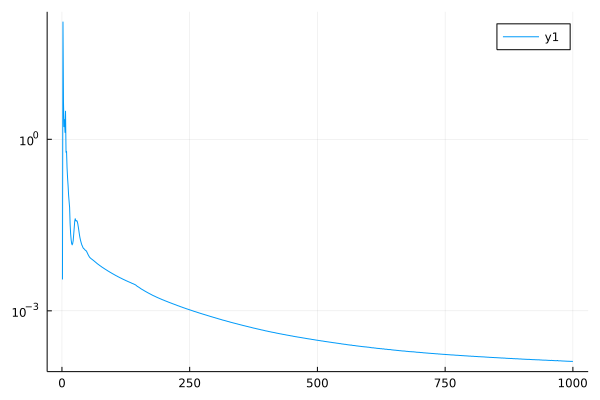

In [32]:
#plot(losses[1:1000],yaxis=:log)

In [72]:
#writedlm("loss_first_interval.txt",losses[1:1000])

1012

1.9637952128205158e-5

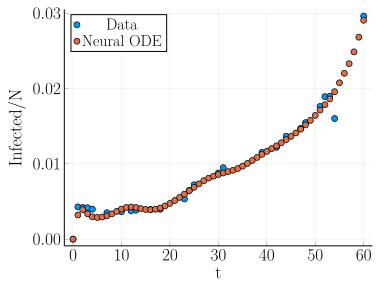

false

In [20]:
callback(result_neuralode5.u,loss_neuralode(result_neuralode5.u)...;doplot=true)

In [31]:
t5 = 91.0
prob_neuralode = NeuralODE(dudt2, (0.0,t5), Tsit5(), saveat = 0:t5)
result_neuralode6 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode5.u,
                                           ADAM(), maxiters = 1000,
                                           cb = callback)

2

1.2545318068636806

3

0.3085026826816707

4

85.73267156537213

5

0.1707228930480612

6

0.12520676719586488

7

0.10748860561818113

8

0.1196818085117014

9

0.13416295187339203

10

0.143065569017661

11

0.15783929975199582

12

0.17229300413739634

13

0.17885611308679733

14

0.18600035700983414

15

0.1901324443196958

16

0.19135100441673505

17

0.1889541711557162

18

0.18448525279044775

19

0.17991038892295863

20

0.1755716257918004

21

0.17242418918730004

22

0.17010271311813924

23

0.16724876604678834

24

0.16396189961968838

25

0.16039843069019885

26

0.15681178924493844

27

0.15336158521745102

28

0.15020421333885137

29

0.14686166776643617

30

0.1433798427920399

31

0.14039321606980634

32

0.13823012407030838

33

0.13695375405658278

34

0.13596304355157418

35

0.13517585228753232

36

0.1346015367785684

37

0.13413821033832948

38

0.13384526924463533

39

0.13363225685200308

40

0.13344524387648452

41

0.1331970208712046

42

0.13281288824240986

43

0.13224822960271582

44

0.1315061990365561

45

0.13053634237770884

46

0.12928540345777054

47

0.1278339662990277

48

0.12621680689303888

49

0.1244236830755193

50

0.12242418557130735

51

0.12022189449086139

52

0.11777449042618598

53

0.11510821201993038

54

0.11207136256408967

55

0.10850567542394297

56

0.1038635710025715

57

0.09777887959037102

58

0.09013024661625303

59

0.07928559270579363

60

0.07168550706529787

61

0.06746658294133145

62

0.05920757459224717

63

0.048503348816592684

64

0.045222399824544735

65

0.04279503760805469

66

0.033950703521451644

67

0.037667248697765776

68

0.028420706466860866

69

0.030117123002699513

70

0.023706142146008392

71

0.02212820824125986

72

0.013604409012348953

73

0.014703267131205847

74

0.014508413509222353

75

0.00948055518250648

76

0.008683630479049525

77

0.016522889404141747

78

0.013559479556381423

79

0.007175813501868364

80

0.00893896991940392

81

0.008343340647346263

82

0.005044059322389569

83

0.007158796748225065

84

0.0047833430973783005

85

0.0063453056535721

86

0.005538909178943385

87

0.004913484760187269

88

0.005476252660532337

89

0.003726600440622099

90

0.004772339900860321

91

0.0036743576316712184

92

0.0037229639662314656

93

0.004108276595709253

94

0.003017281202659439

95

0.0036709280056835066

96

0.0033320398953064333

97

0.002709823607962008

98

0.0033105526470759263

99

0.0026952054766959713

100

0.0024902151796919107

101

0.0028048970330104414

102

0.00220572305935206

103

0.002369458867328376

104

0.002328439874351518

105

0.002035831691718543

106

0.0022740287899680363

107

0.0020023910605366617

108

0.0020587735504366523

109

0.0020847331279882147

110

0.0018668636066198258

111

0.001999208383723872

112

0.001892280011122688

113

0.0018430580792531321

114

0.0019356867245158658

115

0.0018240124865050245

116

0.00184239582359414

117

0.0018949122859849622

118

0.0018141886347444996

119

0.0018108209495211797

120

0.0018403018515739135

121

0.0017951048125628773

122

0.0018111897791554506

123

0.0018076653185076052

124

0.0017837073676493698

125

0.0018093254435161633

126

0.0017959243116514427

127

0.001772988639688946

128

0.0017885474600181544

129

0.0017705993143946612

130

0.001759410461949562

131

0.001767069275322526

132

0.001751305978247358

133

0.001746279407776944

134

0.0017424207858729465

135

0.0017384740690332637

136

0.001722341087475706

137

0.0017326384216025032

138

0.0017306195980760965

139

0.001707775731712927

140

0.0017215590766017092

141

0.0017225117743563474

142

0.0017178722294331694

143

0.0017152873222624932

144

0.00170546784777908

145

0.0016957438933884364

146

0.0017089497342097698

147

0.0017043558345595266

148

0.0017065409674604155

149

0.0017062476425006015

150

0.0017042265031630974

151

0.0016824275659020867

152

0.0017004852791511877

153

0.0016958477289386192

154

0.0016947418228471522

155

0.0016988538589883734

156

0.0016869845526173008

157

0.0016849878952144952

158

0.0016890424505744044

159

0.0016864764214146843

160

0.0016904255058709382

161

0.0016884272039121295

162

0.0016707250580775069

163

0.0016826381234270132

164

0.0016807509525139921

165

0.0016650431074695625

166

0.0016646567845880153

167

0.0016724527325868536

168

0.0016541625230699758

169

0.0016732815633807886

170

0.0016534593654310536

171

0.0016601443325695263

172

0.0016694957794070988

173

0.0016586561552348487

174

0.0016511230356184002

175

0.0016656252002793933

176

0.0016667815042231303

177

0.001657949171844984

178

0.0016532920547761907

179

0.001641117699243987

180

0.0016608772602617256

181

0.001647218145833859

182

0.001657855177773649

183

0.001656947506450865

184

0.0016592136680885386

185

0.0016615507103069271

186

0.0016539614022627058

187

0.001647425743846369

188

0.0016504523470756425

189

0.0016348067926492842

190

0.0016498384649107822

191

0.0016483098369132574

192

0.0016474955839936938

193

0.001648674771975786

194

0.001648322056582011

195

0.001648027870688277

196

0.001623723869631153

197

0.0016453789939838881

198

0.001634426420877251

199

0.0016433878823737074

200

0.001645872490955138

201

0.0016407331621563941

202

0.0016402198437937571

203

0.0016360581881333114

204

0.0016417991421141696

205

0.0016386153148629941

206

0.0016364948455259024

207

0.0016260568251401527

208

0.001634166084355744

209

0.0016400090018746523

210

0.0016347144680079878

211

0.0016262554284875723

212

0.001621677808880037

213

0.001608173596461674

214

0.0016088439819931528

215

0.0016309067067338155

216

0.0016274256975202105

217

0.001611601728138717

218

0.0016277133009331315

219

0.0016232835785224056

220

0.001631429045304088

221

0.0016043632556937057

222

0.0016254477586934817

223

0.0016237769888375836

224

0.0016009884319716189

225

0.0016240632969800688

226

0.0016210265151322635

227

0.0016172067494184613

228

0.0016156086703634665

229

0.0015977138956222007

230

0.0016051873509675533

231

0.0016099557279086554

232

0.0016168976989871509

233

0.0016030864393856215

234

0.0016014495810207565

235

0.0015952110556440627

236

0.0016134473316004067

237

0.0015973851454498043

238

0.0016131276618159159

239

0.0016114843984882947

240

0.001587711714661348

241

0.0015853885712124455

242

0.001609273991598539

243

0.0015996161201524415

244

0.0016125240334095758

245

0.0015921580145350812

246

0.0015969607876110173

247

0.001620556243388363

248

0.0015878960839937957

249

0.0016017733210983058

250

0.0016020605176985925

251

0.0016092299599254527

252

0.0016070688155073029

253

0.0015972167619083253

254

0.001583844576783777

255

0.0016051921635677922

256

0.001631744059789703

257

0.0016331391212018834

258

0.0016197976327334243

259

0.001605500498182989

260

0.0016004748999305478

261

0.0015792067181669206

262

0.0015858549585946661

263

0.0015850699633933555

264

0.0015867161320823485

265

0.0015868108606927863

266

0.001588107787319759

267

0.001588909506892011

268

0.0015874566719177759

269

0.001584471498093077

270

0.0015841672834003189

271

0.0015816522499726509

272

0.001583149940058249

273

0.0015834289419333295

274

0.0015962756357305787

275

0.0015826106014263826

276

0.0015864273927376786

277

0.0015798576285432787

278

0.0015660464133154168

279

0.0015743942896884206

280

0.0015740275260669196

281

0.001573822472769814

282

0.0015735462988211105

283

0.0015734316299274966

284

0.0015685867576108428

285

0.0015694193881492526

286

0.0015465606488865385

287

0.001569261379468004

288

0.0015703135861732222

289

0.0015523175038947793

290

0.0015542875858895271

291

0.001554125280267921

292

0.0015694935693109319

293

0.0015500946739382122

294

0.001552267536520116

295

0.0015748619206436532

296

0.0015656717824227525

297

0.0015846790056655736

298

0.001583578647769973

299

0.0016090880994624162

300

0.0016415167807157852

301

0.001674347376606494

302

0.0017149833335594665

303

0.0018029467913953283

304

0.0018463463396913567

305

0.001889312061182166

306

0.001850677561655141

307

0.0018611825774076268

308

0.0018063372473135005

309

0.0017551649127947847

310

0.0016358049469169826

311

0.0016010446203869467

312

0.0015535522091734086

313

0.0015377800208287535

314

0.0015710402380433373

315

0.0015815684196655807

316

0.001634811653669581

317

0.0016371274493858874

318

0.0016192088554365226

319

0.0015903334463529843

320

0.0015324200779683215

321

0.0015411118144165758

322

0.001545440274233546

323

0.001558954228741882

324

0.0015462129819597869

325

0.001546181737516855

326

0.0015416984316981629

327

0.001515600037944543

328

0.0015391340026353385

329

0.0015363188199687494

330

0.0015389906808467688

331

0.0015132539060147164

332

0.0015001261226618772

333

0.0015350285458246974

334

0.0015236970430804757

335

0.0015330734796669076

336

0.0015599484292899615

337

0.0015784194205191464

338

0.0015550202271734147

339

0.0016073813896209648

340

0.0016382226995440056

341

0.0017167206738206006

342

0.0017653442110852969

343

0.0018539750394469647

344

0.0018549114421833996

345

0.001828231221131214

346

0.001715689382684906

347

0.0016198136853298223

348

0.0015543811897541313

349

0.0014888085781721424

350

0.0015223928504583444

351

0.001545170471158037

352

0.0015478539738801225

353

0.0015389474816340095

354

0.0015749837895507178

355

0.001555778350424786

356

0.0015558812962192725

357

0.0015390701490447

358

0.0015054164899511615

359

0.0014936677930874904

360

0.0014912506776060366

361

0.0015042987419658504

362

0.0015149672877270675

363

0.0015372120277646639

364

0.001557307783253613

365

0.0015769319331312265

366

0.0015904862583314841

367

0.0015810358682733778

368

0.0016040236867707956

369

0.001594518461989805

370

0.0016010444989501091

371

0.0016038768871256305

372

0.0016220489230812742

373

0.0016473197820646708

374

0.0016588597852503465

375

0.0016719100943595744

376

0.001620968796748039

377

0.0015738343928097857

378

0.00155342037965035

379

0.0015032272842973216

380

0.001503935822273381

381

0.0014744090841443411

382

0.0014937085853350231

383

0.00148285171547287

384

0.001483348105613068

385

0.001491031626581871

386

0.0014917889005636672

387

0.0014839260538945616

388

0.0014782006527225677

389

0.0014866747722966202

390

0.001482600639706553

391

0.0014607694788168369

392

0.0014643141747110564

393

0.0014550433244916437

394

0.0014600034421598904

395

0.001496362229428473

396

0.0014758126355352184

397

0.0014990486904507983

398

0.001493981822300089

399

0.001466484593020392

400

0.0014935351107953406

401

0.0014758474707215368

402

0.001477937883022079

403

0.0015142268475983104

404

0.0015352021019395463

405

0.0015560687079534997

406

0.0016169412382694415

407

0.0017016768565876015

LoadError: InterruptException:

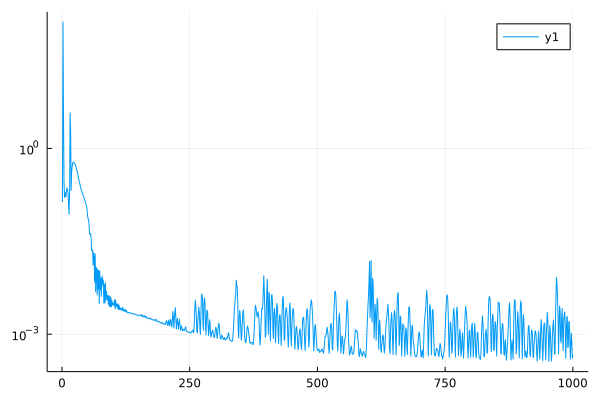

In [37]:
#plot(losses[1:1000],yaxis=:log)

In [75]:
#writedlm("loss_second_interval.txt",losses[1:1000])

408

0.0008924229667927283

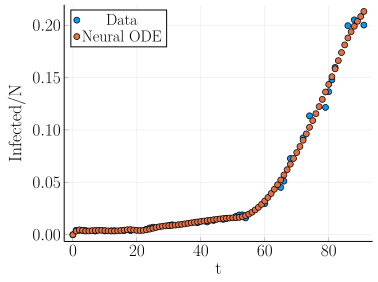

false

In [32]:
callback(result_neuralode6.u,loss_neuralode(result_neuralode6.u)...;doplot=true)

In [26]:
t6 = 103.0
prob_neuralode = NeuralODE(dudt2, (0.0,t6), Tsit5(), saveat = 0:t6)
result_neuralode7 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode6.u,
                                           ADAM(), maxiters = 1000,
                                           cb = callback)

1

0.07379977182165365

2

0.26295559606308755

3

0.20119466638692085

4

0.42941332081519795

5

0.21217389388287153

6

0.17541529028034536

7

0.19049671304532795

8

0.20558788716586043

9

0.2120772010195291

10

0.2081323519381462

11

0.19543609038224102

12

0.18061732647115122

13

0.1720287623732146

14

0.17109038012157055

15

0.17524037841400714

16

0.18014611297069985

17

0.18078182314732663

18

0.17625484591078153

19

0.1684790028003074

20

0.1603824366851529

21

0.15561491305056513

22

0.15357521611751263

23

0.15602598920173646

24

0.1447566824058968

25

0.12820877066550168

26

0.11582424692644186

27

0.09994458367353155

28

0.09077992166518502

29

0.11753307484803217

30

0.1326641812420958

31

0.06401432662318228

32

0.34443008079235776

33

0.3406008692431754

34

0.250403784865132

35

0.06048504788325043

36

0.16151847061350172

37

0.08807199392224363

38

0.15772058884322518

39

0.1575747500634178

40

0.14773187054528944

41

0.11939056286409301

42

0.12179755836336581

43

0.12167446331457951

44

0.10131892699219502

45

0.1515575815441034

46

0.0951168994210232

47

0.13966323017954232

48

0.07643653317110011

49

0.09969386482512231

50

0.06920978583690265

51

0.10873647961412743

52

0.09001646899715623

53

0.0647431073244774

54

0.04801015415060504

55

0.052719938072874506

56

0.04661255953934595

57

0.05654327992570535

58

0.06079851956640796

59

0.06761383297373387

60

0.04325197634549173

61

0.13329969639562864

62

0.17745872534633672

63

0.2561561928120452

64

0.21572665700523994

65

0.15533211828382487

66

0.1398520361614836

67

0.1613644990090308

68

0.18660733958081582

69

0.19337892873769214

70

0.18109927511907056

71

0.16087585343595315

72

0.14269613215213428

73

0.13141020720469945

74

0.12453697144085144

75

0.12041147200563541

76

0.11672695757390397

77

0.10757553746268869

78

0.083708283123714

79

0.043533040525364546

80

0.3256195993726695

81

0.05882114399756369

82

0.13271458980133785

83

0.13334839351381106

84

0.09799478030210379

85

0.07393888052940521

86

0.07290595186905495

87

0.08930202305301056

88

0.10753464292846894

89

0.10029377381247859

90

0.0766365632930763

91

0.05923266151982713

92

0.05718323582212168

93

0.06875356682344112

94

0.07378459584777679

95

0.048493646179231256

96

0.03852517949346679

97

0.054408343463760986

98

0.055071930438751034

99

0.0356231701259655

100

0.03573096014110313

101

0.04799015639888708

102

0.03593905246735591

103

0.029989467142999545

104

0.03839143615964148

105

0.037497441637250786

106

0.028630338165070924

107

0.03373757481751502

108

0.03345813843644255

109

0.026863445249966873

110

0.02590991273341093

111

0.028105421625821383

112

0.02466036955984206

113

0.023734410385102468

114

0.025460560878404252

115

0.02279502780947442

116

0.022699181380619743

117

0.023025610361813463

118

0.02053794789871405

119

0.022205951052703052

120

0.021104644633139456

121

0.020229923855851744

122

0.021277848801837706

123

0.01921319612302489

124

0.01993341990626235

125

0.018946737802148082

126

0.018958714086341647

127

0.01858242995571221

128

0.01823506493752397

129

0.01818911205053233

130

0.01750419540946794

131

0.017812213271070916

132

0.017080339916753975

133

0.01739408433679668

134

0.016734295619020748

135

0.01700165943588805

136

0.016451444169556236

137

0.016647558789568563

138

0.01614826817722705

139

0.016282732164428174

140

0.015857361391920843

141

0.015794944690156902

142

0.015423656238856987

143

0.015199769828777032

144

0.015216117281921817

145

0.014803358992976585

146

0.014722719056510868

147

0.014305779919873661

148

0.014292387032672042

149

0.01890331495507263

150

0.03268582132736638

151

0.022050077069728218

152

0.022624537670853033

153

0.01582219849436809

154

0.017994474345329376

155

0.016870964886045427

156

0.012633851176341263

157

0.017415952446293053

158

0.013553593057633338

159

0.015539105103150845

160

0.011947588470259396

161

0.0128850877116416

162

0.01307870915814768

163

0.012179593001809184

164

0.011255049523283185

165

0.010291768225266548

166

0.011107888343299677

167

0.010617502312158885

168

0.009468545483275064

169

0.008920669455802803

170

0.00835676956889841

171

0.008224296831181732

172

0.007443177845340435

173

0.0067793876830011006

174

0.006454544346441616

175

0.0063433858497195725

176

0.005246788434402027

177

0.004820345953922701

178

0.0049648190672091095

179

0.004227643639278826

180

0.003828361635983424

181

0.003845018386269757

182

0.003204836594712483

183

0.0027432466554277914

184

0.0027632119230337365

185

0.0025896532750628713

186

0.002653786965582614

187

0.0030594769101388096

188

0.004205358818236651

189

0.0040870522529733826

190

0.003198640278264846

191

0.00221639164126399

192

0.0032932082405981236

193

0.005530188781520872

194

0.005137374098420901

195

0.005841811338438182

196

0.00331430871964134

197

0.0015979802270980775

198

0.0033122630831950804

199

0.007960950134120386

200

0.020147192980099787

201

0.01960582373003925

202

0.006979039053001686

203

0.004283214393965579

204

0.00924774568559747

205

0.005289640327930462

206

0.0054788158959691025

207

0.0060176221479403946

208

0.0035243387068921257

209

0.005719503190225928

210

0.0017784524366235904

211

0.0055517085669901925

212

0.004327288612074222

213

0.0018673457311173698

214

0.006566757302490491

215

0.005122342209781347

216

0.001585504971811693

217

0.0034724700440433506

218

0.00444073805601098

219

0.0014683205685873985

220

0.003019059223543685

221

0.0028065488105290942

222

0.0014084473513705361

223

0.002973839508452616

224

0.0017241589597251593

225

0.0019011545631507313

226

0.002417212331878866

227

0.0012279706011340207

228

0.001924442159748792

229

0.00197060439479913

230

0.001063969257821883

231

0.0013559305780350042

232

0.0015115075919349455

233

0.0010627903295825432

234

0.0011081485726691265

235

0.0015136343375544068

236

0.0015323424842875403

237

0.0009639915101300461

238

0.0010114656733111935

239

0.00108251335543159

240

0.0008731600758520172

241

0.0009354057193414581

242

0.0011814369380095684

243

0.0011750328933762834

244

0.0009133794776502862

245

0.0008373756738912346

246

0.0010300303851851946

247

0.0010305086753083974

248

0.0007926865751474317

249

0.0008140475329066028

250

0.0010012952075094904

251

0.0009655995484465495

252

0.0007860905089914628

253

0.0007109345819388703

254

0.0006950655792024637

255

0.000691139174336624

256

0.0006971897971901483

257

0.0007374804888544409

258

0.0008340797914249048

259

0.0007787390247828775

260

0.0006507417997671537

261

0.0007333406310430469

262

0.0009489384137942126

263

0.0009911264493816052

264

0.0007468333309587311

265

0.0006119591659138302

266

0.0008269702835982012

267

0.0011778335786652883

268

0.0014451401549976958

269

0.0012175869069720386

270

0.0008751062764031849

271

0.0005986649463926408

272

0.0006681792509607802

273

0.0010576743550786724

274

0.0011967230903217531

275

0.0013803427264900857

276

0.00129290342864347

277

0.0010830791166981243

278

0.0006835698052759938

279

0.0005738598165150997

280

0.0009974679456450208

281

0.001550418055710124

282

0.0022588250415445962

283

0.0025413971555278405

284

0.0027831990533101762

285

0.0021624985365519354

286

0.001460377891734674

287

0.0009526576621829251

288

0.0006929100704217343

289

0.0005619410468065026

290

0.000584117307366122

291

0.0009214332856867244

292

0.0010279892300901713

293

0.0008200014217484003

294

0.0005761689730265911

295

0.000529155010530165

296

0.0004956586815286883

297

0.0004915261896140445

298

0.0004950242487338608

299

0.0004904395847337916

300

0.00047130410689068085

301

0.0004786195964218238

302

0.00047738273799489517

303

0.0004900522896658123

304

0.0005500375500716657

305

0.0005942354543262232

306

0.0006057747127512373

307

0.0006027436520423629

308

0.0007406845127821807

309

0.0011285255657291179

310

0.0019142009229398016

311

0.002895378505489798

312

0.004818350679354646

313

0.003813334356807921

314

0.002590774707492454

315

0.0009605013376307664

316

0.0005760767409925399

317

0.0014342661953033156

318

0.00274053804808727

319

0.0038112237333344477

320

0.0016527383513820122

321

0.0005132921818435227

322

0.0009657604184452296

323

0.0018912721128819276

324

0.0024274091364116547

325

0.0015053408739719018

326

0.0008492247347148534

327

0.00048700778804351317

328

0.0006411626675215875

329

0.0011756591974285775

330

0.0013086970136710785

331

0.0012616249431142603

332

0.0007939112576504961

333

0.0004658885197113085

334

0.0007260385849418155

335

0.0011502630763314107

336

0.0011467025224429332

337

0.0007425727298758358

338

0.0004816278092366865

339

0.0004661073463605182

340

0.0005798813856408283

341

0.0006369644930491587

342

0.0005739344158475233

343

0.0004674403890222594

344

0.0004052558999502657

345

0.00041168100231259494

346

0.0005310233244668661

347

0.0007455581380238419

348

0.0011928149589972782

349

0.002015434812393517

350

0.0035496296055932464

351

0.004017782662341352

352

0.004352318778959106

353

0.0023192204675264515

354

0.0007817313146954772

355

0.0006085270812778203

356

0.0016364263855270444

357

0.002373037641823318

358

0.0011648855565930876

359

0.00043302005716731705

360

0.0009320984117893731

361

0.0014840784185408875

362

0.001852347001074189

363

0.0012012382618078695

364

0.0005456937917999962

365

0.00045744274909174476

366

0.001044848764542412

367

0.0013785580114513316

368

0.0007973143582215164

369

0.0004164545701721566

370

0.0005684822222686991

371

0.0006908498493274868

372

0.000663531257462079

373

0.00042698568615537477

374

0.0004331852906117826

375

0.0007740028208656699

376

0.0011583297335879428

377

0.0012574020747371081

378

0.0008002940799373928

379

0.0004379985877250433

380

0.0004892901981047991

381

0.001212111397213223

382

0.0018730461532784502

383

0.0012203267382247362

384

0.0005049563735164341

385

0.0004972717446561456

386

0.001748380134674458

387

0.0035057916934696

388

0.002566475455960112

389

0.0014582503178499507

390

0.0005136875609573097

391

0.00047354394911845857

392

0.000844170591052212

393

0.0008058674381148132

394

0.0005980201702556379

395

0.000421831965942914

396

0.0003568214908172961

397

0.0003612667607232284

398

0.00037820495770913334

399

0.00035946091841920964

400

0.0003463609816716437

401

0.00037797391403862884

402

0.0005138916813222288

403

0.0007249239498552968

404

0.0006999872967597564

405

0.0004835235530479293

406

0.0003694563018923491

407

0.00033806322688279705

408

0.00033879786644906864

409

0.00031541334590822726

410

0.0003256394099368354

411

0.00032416763178972225

412

0.00032760516524504054

413

0.0003234910343972291

414

0.00031887326120578655

415

0.00032121963042370096

416

0.0003213176253162492

417

0.00032579361997406195

418

0.000456678190236636

419

0.0009596632277960797

420

0.001568341310744991

421

0.0019135664434281382

422

0.001239221733713605

423

0.0007137694001451843

424

0.0003918720403657065

425

0.0004547114111579347

426

0.0006825786379625261

427

0.0007435944770455852

428

0.0010948744299710631

429

0.001211898335200127

430

0.001036201439552349

431

0.0007359293885521181

432

0.0005917682109201309

433

0.00045839394126046787

434

0.0004007371304465976

435

0.00032873880862733823

436

0.00032830155982263576

437

0.0005798012938804517

438

0.0012081648375286999

439

0.002123389655693374

440

0.0017211422394217794

441

0.0011080472521093948

442

0.0004249728305487079

443

0.00038637961410859135

444

0.0009847050368856113

445

0.0014721538983846192

446

0.0016700300484253018

447

0.0009474753704977512

448

0.00039939392740436224

449

0.00035617574764987975

450

0.0008001510661764463

451

0.001389490995703836

452

0.0013656287412941999

453

0.0013947510563445814

454

0.0009430376343975394

455

0.0005511980387882417

456

0.00033806593241203123

457

0.0004012515972001725

458

0.0007183705302791646

459

0.0009949802696154369

460

0.0011821339520228474

461

0.0011512461073537093

462

0.0010909926876693239

463

0.0005800878586905544

464

0.00032292353674042806

465

0.0003229109639709875

466

0.0004991651825651294

467

0.0007679879121700545

468

0.000895657992994136

469

0.0014580830107604704

470

0.0020595230226721412

471

0.003323045784493272

472

0.002730268568958075

473

0.0021457951296053996

474

0.0009253831096752538

475

0.0003490092396969042

476

0.000531100669283236

477

0.0008166195253245396

478

0.001095665758136319

479

0.0009332026210451094

480

0.0007239656375443179

481

0.0003536941860486918

482

0.00043736941650227007

483

0.0012793454819359138

484

0.0020333419005683475

485

0.002924308468437792

486

0.0020055955629656747

487

0.0011171340841286122

488

0.00044759815399742365

489

0.00039402467936445644

490

0.0006318447983061331

491

0.0008847045524649315

492

0.0008701895084762803

493

0.0005653185447611119

494

0.0003178471003392258

495

0.0004092228345958385

496

0.00041599536935019995

497

0.0005592162441192761

498

0.0008040448973514923

499

0.0009320562680748534

500

0.0009026140113160473

501

0.001011879792486606

502

0.000765684920675209

503

0.0005089006316722605

504

0.00031215026211755913

505

0.0004360802157929236

506

0.0006450307821253554

507

0.0008529821527667339

508

0.0013052938118061008

509

0.0015084716841062005

510

0.0020542670773368017

511

0.0013220087367626981

512

0.0009884193317496496

513

0.0006124074462480928

514

0.0005267072431903835

515

0.00044378834005339573

516

0.0003380625292035231

517

0.0002946720059779544

518

0.0003090297403405359

519

0.0004107225996491541

520

0.0007305703305591647

521

0.001203976522480734

522

0.0011173862150246439

523

0.001198106053174308

524

0.000900062164273825

525

0.0005538488143575724

526

0.0003623422466163404

527

0.0003186119009391959

528

0.0002911798857484013

529

0.0002871843057462605

530

0.0002780490149354735

531

0.0003152546550036576

532

0.0004382980877676132

533

0.000863905964898733

534

0.0015762199998056584

535

0.003038142613790398

536

0.0028448310128127833

537

0.0026332152422386874

538

0.0014187094858238083

539

0.0008848737638311318

540

0.0005120968353053444

541

0.00039187458332496137

542

0.0006538510287829361

543

0.0010542547731635806

544

0.0011541016365293156

545

0.0007272228953801569

546

0.0004542279916009168

547

0.00030561211073746816

548

0.00038919888942396357

549

0.0007964777778804088

550

0.0011753253350732051

551

0.0015020404106471188

552

0.00163375023034606

553

0.00214847417498549

554

0.0018579599346082174

555

0.0011134288496054748

556

0.0003907298911010931

557

0.0005336335429723698

558

0.0014051596657171078

559

0.0023761621903415605

560

0.003971582662391815

561

0.002341206245916797

562

0.0010954355362088144

563

0.0003355930985839315

564

0.000494243926426244

565

0.000935842071855288

566

0.0006617402474339642

567

0.00038179050804575435

568

0.0005326769365443935

569

0.0012111985684513848

570

0.0024879011977983942

571

0.002520913487530043

572

0.0024382275146625893

573

0.0007833844936526992

574

0.0004489318687547915

575

0.0015160997228232606

576

0.0022958512597634224

577

0.002332372109538395

578

0.0005611487091383047

579

0.0008338537157196001

580

0.003037645920191244

581

0.0032696909850975083

582

0.0021476900011059745

583

0.00037573003749949554

584

0.001816821168506188

585

0.005363239132502788

586

0.0035157844855455093

587

0.0012939886434833188

588

0.0010153898147406747

589

0.00382264646116098

590

0.004040312416642719

591

0.0009100860123105479

592

0.001401621802887569

593

0.0035112151656007

594

0.0018940996103971944

595

0.0005003150626978942

596

0.0009293063750267341

597

0.00175668131385213

598

0.0011581227920737425

599

0.00033727550897976415

600

0.0009968813240268074

601

0.001424188143315633

602

0.0006917628866809235

603

0.0004493450863567447

604

0.0008406251139317993

605

0.001106788625784027

606

0.0005694964168228777

607

0.0004316933683750783

608

0.0009400743534601078

609

0.0010146009341482497

610

0.0007603880622978514

611

0.00036999469204984544

612

0.0003519866879437735

613

0.0006067111400946873

614

0.0008606343010211274

615

0.0008328855735522078

616

0.0004902014215247311

617

0.00032703006195658024

618

0.000402282558277719

619

0.0005004867442943109

620

0.0006523460734380827

621

0.0005117316973266445

622

0.0003137801589397569

623

0.00035119346990893937

624

0.0008221618905212042

625

0.0015724074900823112

626

0.002557195787446215

627

0.001381069474341636

628

0.00039933068034424425

629

0.00043682402965768824

630

0.000839657207794084

631

0.0013108813467890838

632

0.0011695781047971353

633

0.000768551402111394

634

0.0003765326755809882

635

0.0004293684468118285

636

0.0005555512864774119

637

0.0006231197686873447

638

0.0004242290429828512

639

0.00037329035367008245

640

0.0003831458782617416

641

0.0005839958464686266

642

0.0007889673622107725

643

0.0006680167136230239

644

0.00035891791532570867

645

0.00034088103503143117

646

0.0007819354107840502

647

0.0007361711489663695

648

0.0007771571801555416

649

0.000270136720250903

650

0.0005304583904228274

651

0.0011810579423666206

652

0.0013380316243768924

653

0.00147163630484231

654

0.000624243470295628

655

0.00037849033012285656

656

0.0005391849986393848

657

0.0006866415309549943

658

0.0007765698941711936

659

0.00033720736697718785

660

0.0004177864894310693

661

0.000391636819966844

662

0.00036487415458469927

663

0.00042268790446639456

664

0.0002730830664991872

665

0.0005255974452002756

666

0.00039043680967561933

667

0.00044828527058429584

668

0.000571387006820763

669

0.0005637822765676274

670

0.0010677997912609124

671

0.0010824202588282199

672

0.0012271264236336905

673

0.000847337101540251

674

0.0003992233729946281

675

0.0003764965763087659

676

0.0003941966617289049

677

0.0005929617483558451

678

0.0007387771057967598

679

0.0004124346155426517

680

0.000402917527465343

681

0.0006987443672799023

682

0.001671015578834111

683

0.0019360394867815438

684

0.0023397328124277923

685

0.0007116534152285895

686

0.0005082384119895891

687

0.0020309930138868127

688

0.0021893480012982907

689

0.001405768900406207

690

0.00031440594610635024

691

0.001434108856820001

692

0.0034716017706140187

693

0.002877335269858479

694

0.0018687654512742006

695

0.0003144973057134165

696

0.001657318283920517

697

0.004993277934415728

698

0.0027249138334698546

699

0.0007863108769475209

700

0.0009631534172015187

701

0.0021122579661701844

702

0.002257990998643655

703

0.0009470364398356493

704

0.0008936728177661644

705

0.0016043200935220738

706

0.0014058057289514441

707

0.0005069173324863538

708

0.0005391277048709054

709

0.0006484923021413918

710

0.0011642967949597042

711

0.0011070264981823202

712

0.0007375476766371701

713

0.0005182092234803573

714

0.00042981470484144073

715

0.0014236340018672648

716

0.0018229037908390918

717

0.0018433871059557003

718

0.0006071589991173916

719

0.0008337431336749885

720

0.0028916960130810016

721

0.0022455638096597584

722

0.0015679763033926975

723

0.0004414906989362708

724

0.0011567051544855405

725

0.002378520635434885

726

0.0015872021842024164

727

0.001254117945011741

728

0.00033250021274353834

729

0.0008971963478342899

730

0.0016649628966380796

731

0.0012574281617554722

732

0.0007377498456681267

733

0.0006076147456041633

734

0.0023187540842884127

735

0.00407366713310428

736

0.0017891210598871467

737

0.0007172569842736978

738

0.0026876325219583165

739

0.002760022028965905

740

0.0012136382209950428

741

0.0005286306189069816

742

0.001828423502784697

743

0.002635461658575786

744

0.0006684568766180919

745

0.0007264449413345532

746

0.0021212975898658253

747

0.0014464603805636113

748

0.0003363941387731604

749

0.0008300956400559362

750

0.0011984945468900673

751

0.0008179828337472081

752

0.00033563424280109587

753

0.0005836671596582069

754

0.0010916246329090802

755

0.000839762673100171

756

0.00035688464594088544

757

0.00046754069455385704

758

0.000839935676422649

759

0.0006478814557493298

760

0.00037412527374008073

761

0.00032836627700886454

762

0.0005008366792963855

763

0.0006766557703323213

764

0.0007778153985200257

765

0.0006639277204788623

766

0.00039786862064872356

767

0.0003082442553540047

768

0.0006347500828343049

769

0.0008232408281327293

770

0.0008571328785799555

771

0.0006024060202711483

772

0.0003143649923325091

773

0.0004512221859534267

774

0.0007471698199455673

775

0.0006287747721396138

776

0.00027559325021085174

777

0.000497397099239592

778

0.0011768035743857709

779

0.0026586287185412227

780

0.0014422093277678628

781

0.00036169767790214253

782

0.000714990945205476

783

0.002238022110220605

784

0.004075590534252062

785

0.001826212581785594

786

0.0003522457709197287

787

0.0020701402651228

788

0.0023151512296292823

789

0.0016392294023526374

790

0.0004650024724807128

791

0.0009941450031305964

792

0.0018865151133305846

793

0.0009366687171864785

794

0.0005123728436043022

795

0.0007602535438263317

796

0.001024518483142938

797

0.000995632266301487

798

0.0005845547302401106

799

0.00040095283248973

800

0.00041439125918302515

801

0.0007325859175893979

802

0.0009605705404844683

803

0.0009640088297146256

804

0.0008603798493946799

805

0.0003476420463436688

806

0.0003641652330391639

807

0.00027972672170617046

808

0.0003113278666299745

809

0.0006266310849216032

810

0.0009496692157584212

811

0.0007599199561299108

812

0.0004757538929946123

813

0.0002803912796574144

814

0.0004951372834286866

815

0.0008573789315383675

816

0.0007661629897199676

817

0.0005575843475869409

818

0.00034030967207824067

819

0.0002659651644297312

820

0.0002850428781302458

821

0.00033809169257098765

822

0.0003662683719632053

823

0.0003440555417852492

824

0.00032260435675242485

825

0.00036519075793298985

826

0.0004518655770503757

827

0.00046182955558000027

828

0.00038649644820661983

829

0.00029199298158565995

830

0.0002540398034457698

831

0.0002583836948975132

832

0.0002568399006035876

833

0.00028226291602171906

834

0.0002670047449370678

835

0.00027865428333325685

836

0.00025941311807252084

837

0.00024923875971360197

838

0.00032698321332713627

839

0.00035869026011055245

840

0.0002862939162533346

841

0.00023873136151887758

842

0.00027921780014803567

843

0.0006106409206012327

844

0.0013070973269858816

845

0.001269910030133594

846

0.0010887351412271803

847

0.0003365651799484324

848

0.0005248281164802808

849

0.001370235496302787

850

0.0009566094035491021

851

0.0005779516224906832

852

0.0002543748030077551

853

0.0005344020999306061

854

0.0012213417530923356

855

0.0016036368115841463

856

0.0020099610133413586

857

0.0011056033074700199

858

0.0005072283813442774

859

0.0003352416900780453

860

0.0011869227981689743

861

0.0024659360727712558

862

0.0014793796301898817

863

0.0006934185133959932

864

0.0002741449958581872

865

0.00041309821330166055

866

0.0006380581696696216

867

0.0005065634094652861

868

0.00032634971014366845

869

0.00026439328638996814

870

0.0005279357116401742

871

0.001029149616576011

872

0.0009913466136815807

873

0.0007808266647411515

874

0.0003951864300530803

875

0.0002650680569880316

876

0.0004971402529856165

877

0.0009493451416674208

878

0.0013937315788297604

879

0.0011431720030161963

880

0.0007499913904888792

881

0.00035189860690698274

882

0.0002531044446509002

883

0.0003356380206296463

884

0.0003893282504765366

885

0.00035567605241334973

886

0.0003057679790002916

887

0.0002442136772194018

888

0.0002663914664396568

889

0.00033236301485912014

890

0.00042784106649357143

891

0.000434678707234303

892

0.00043639145460518347

893

0.0003122461805062665

894

0.0002578670105203787

895

0.00024990816949873885

896

0.0002922044533156968

897

0.00034011394811145026

898

0.00032252181976143455

899

0.0002443873151099437

900

0.00027257791120780027

901

0.00042684376108835737

902

0.0006842975093874757

903

0.0011550290271647987

904

0.002215547292085773

905

0.0017374951183057627

906

0.0013795149569051546

907

0.0005569569830999151

908

0.00030469929265877375

909

0.0004867394732609398

910

0.000847133300523933

911

0.0010553906059074308

912

0.00078084452598492

913

0.0006148867366179159

914

0.00042583325232731066

915

0.0002851562947395968

916

0.00025697131725609774

917

0.00048818639831204355

918

0.0010106627379112768

919

0.0013920885012415813

920

0.0015655587291323397

921

0.000771014277612679

922

0.0002764367708619162

923

0.000468472213267512

924

0.001361067519315487

925

0.0025757851860895107

926

0.0024163772825989073

927

0.0018560398692252435

928

0.0005205958828933945

929

0.00036195638905545807

930

0.0013101771518498348

931

0.0017462117812239873

932

0.0015571489430595143

933

0.0003666032513158556

934

0.0007821606428709357

935

0.0017763801447947026

936

0.0009123522177188746

937

0.00028073099005735015

938

0.0007342112265459901

939

0.0014817846657054318

940

0.0017615581052908144

941

0.0005376895536240328

942

0.0004444139812296967

943

0.0013018487080433683

944

0.0013446008324878708

945

0.0008495293517445141

946

0.00026677075789310954

947

0.0012113652276892828

948

0.0026193655691930584

949

0.0016932145393796416

950

0.0007566325597248777

951

0.0003466954319682102

952

0.0006264979018448147

953

0.0008875663843884198

954

0.0005426049567092054

955

0.0002549623290630001

956

0.0004183677355361237

957

0.0004698093669511387

958

0.0006748374897438828

959

0.00047894962030770694

960

0.0003364261559541644

961

0.00025864140251204333

962

0.00027815408402119134

963

0.00033583143040722004

964

0.00029310544782051683

965

0.00025741496065471043

966

0.0003212613482655559

967

0.00042016576846755317

968

0.000567458716830665

969

0.0006287287843121334

970

0.0005699138257125907

971

0.0005277939563134594

972

0.00034136847315650664

973

0.00025840190465214736

974

0.0003895497149813573

975

0.0007793345599565087

976

0.0013515399745914014

977

0.000983676389629164

978

0.0004558536409989402

979

0.000289714463678505

980

0.00031127577782945993

981

0.0004558459123838337

982

0.0004069700956176812

983

0.00037299534800724335

984

0.0002997949367551686

985

0.000322527896605903

986

0.00028284745079942256

987

0.0002933984228401938

988

0.00024348657202087997

989

0.0002673484288143115

990

0.0003083471787221575

991

0.00041565898932534285

992

0.0004970848483265667

993

0.0006714742476252849

994

0.0006521277651063336

995

0.0006507422022142702

996

0.000628872651147127

997

0.0006691226913948717

998

0.0007608109647859613

999

0.001222164047057122

1000

0.0012102446827105416

1001

0.00023873136151887758

u: 5754-element Vector{Float32}:
  0.18280078
 -0.04753868
 -0.19789772
 -0.17568369
 -0.10665362
  0.07733968
 -0.019646615
 -0.00985371
  0.22399281
 -0.24762101
  0.019624444
  0.14348467
  0.08279765
  ⋮
 -0.18843846
  0.20496106
  0.08379239
 -0.0903576
  0.09080334
  0.10587852
  0.005830847
  0.26627097
 -0.011673661
  0.001580275
  3.4103068f-5
  0.01141523

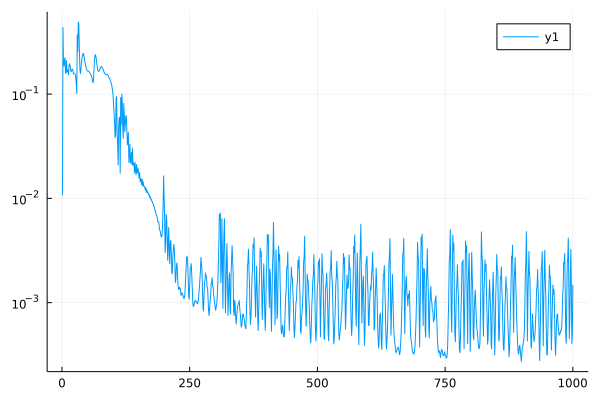

In [42]:
#plot(losses[1:1000],yaxis=:log)

In [76]:
#writedlm("loss_third_interval.txt",losses[1:1000])

409

0.00017124538751597045

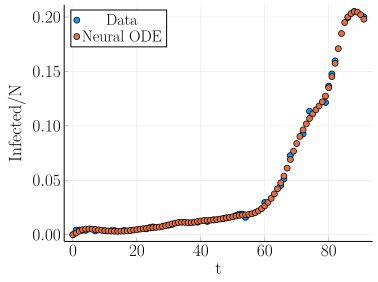

false

In [33]:
callback(result_neuralode7.u,loss_neuralode(result_neuralode7.u)...;doplot=true)

In [36]:
t7 = 134.0
prob_neuralode = NeuralODE(dudt2, (0.0,t7), Tsit5(), saveat = 0:t7)
result_neuralode8 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode7.u,
                                           ADAM(), maxiters = 1000,
                                           cb = callback)

1

0.02896261456266474

2

0.3844637908543596

3

0.32531133330273976

4

0.18226773419529618

5

0.1720956005066742

6

0.16005265728464635

7

0.15778348737370745

8

0.16592215778175518

9

0.16752404576189772

10

0.15302039656687694

11

0.15058141033337252

12

0.15755505776770812

13

0.15972535398961357

14

0.15381845746445877

15

0.1465897634618775

16

0.1443835475520116

17

0.14539229627866435

18

0.14267775076308203

19

0.1340800180268513

20

0.130884790715194

21

0.13141157547448326

22

0.12444983450433728

23

0.11928444531842457

24

0.11940708977777933

25

0.1200496424970648

26

0.12181060121969702

27

0.1185164277348642

28

0.1192722309721645

29

0.11880753204830216

30

0.11396549738123146

31

0.11404699751932375

32

0.11796195193336842

33

0.12615864536994437

34

0.12208542159865647

35

0.1194691107730946

36

0.12582490178268263

37

0.12304057161496273

38

0.11285943165087611

39

0.11099730210258385

40

0.11100515401465756

41

0.12373981426417181

42

0.12488179372372621

43

0.12008171648856242

44

0.11247891572543052

45

0.12061105144150498

46

0.12647788977699514

47

0.11503037394096531

48

0.10677579465111378

49

0.10954951993559198

50

0.10817321965927619

51

0.11143213839935413

52

0.11143138236986648

53

0.1056472284154713

54

0.10543104459987088

55

0.10158905656202352

56

0.10341815988953948

57

0.10621481037503128

58

0.10319555572927944

59

0.10111126830936451

60

0.10063641106380025

61

0.09833050103322889

62

0.10133810862124361

63

0.09884572065027084

64

0.09963125598865599

65

0.09730154445688954

66

0.09714020329671988

67

0.09688248812307551

68

0.0969924268186631

69

0.09692802874589679

70

0.09542234707060995

71

0.09550046147029438

72

0.09477507437169173

73

0.09467521465509175

74

0.09422232048642307

75

0.09364600769666144

76

0.09333351022372055

77

0.09273693210616929

78

0.09267006046600712

79

0.09200177282107105

80

0.09143137368532131

81

0.09055633716550654

82

0.0896073403668685

83

0.08880503734518724

84

0.08764287662084455

85

0.0861071310244377

86

0.0730078847846033

87

0.06335293880314682

88

0.6772028806626487

89

0.26259334785611577

90

0.2681321669622102

91

0.24066655533804823

92

0.20804899405995175

93

0.2268127610406776

94

0.26522075752667507

95

0.21686369976847927

96

0.21897042989313725

97

0.20865892629736849

98

0.19398448591939027

99

0.2053344837958325

100

0.18908239978299965

101

0.1932626562358923

102

0.18639722327731012

103

0.21031360064014734

104

0.20948941731700627

105

0.24352952745831852

106

0.19381045500532335

107

0.1663421404422764

108

0.2436200993621539

109

0.1879850354902773

110

0.1758101431291979

111

0.19914886656138875

112

0.2097349609504497

113

0.19958272306089114

114

0.18021260315270732

115

0.1702525262773813

116

0.17748402564922677

117

0.18755704975136545

118

0.18227750537074072

119

0.17033759464437334

120

0.1680235028432578

121

0.17313532019668587

122

0.17756193497486414

123

0.16950331052039352

124

0.1618959904543849

125

0.1609530614826955

126

0.16467292590755875

127

0.16080896237132009

128

0.15275942058618552

129

0.15135981202222842

130

0.15212793945511996

131

0.14707725341136646

132

0.14091524978126901

133

0.14368491437418032

134

0.13817328167370216

135

0.14113300357817105

136

0.13990089690941132

137

0.14007424870669066

138

0.1399268224038756

139

0.1413317312215506

140

0.13883021443025367

141

0.14328267991464627

142

0.13691666903651856

143

0.14021665861534283

144

0.1377165981658569

145

0.13718788031307494

146

0.13545849413045782

147

0.1365230849809141

148

0.13439949718134014

149

0.13589156206843592

150

0.13439672977767025

151

0.13503664211424288

152

0.13463776969544228

153

0.13415589425827573

154

0.1349308791983589

155

0.13375789072667857

156

0.13437029809546086

157

0.1334267611373337

158

0.13370001154160982

159

0.1330308279177354

160

0.132773525738828

161

0.1324402235017178

162

0.13192715747651312

163

0.13192942409867908

164

0.13137086700360667

165

0.13150546265884067

166

0.13105352279500232

167

0.13104390013706435

168

0.13066619677075822

169

0.1304237935000326

170

0.13015363686445425

171

0.12977771227626891

172

0.12955089239557221

173

0.12914344753647378

174

0.12899299402787046

175

0.1285815920851317

176

0.12836189326750364

177

0.12795885159960585

178

0.12770095445006804

179

0.12733000645711118

180

0.12702858755949664

181

0.1266559691978674

182

0.1262885374227351

183

0.12590918173659754

184

0.12550250128652277

185

0.12506712570460032

186

0.12461266431664751

187

0.12415835660483478

188

0.12361685438317413

189

0.1230826963768325

190

0.12237974562282056

191

0.12170338510441073

192

0.12115979017176436

193

0.1208104353054916

194

0.1202530826661325

195

0.11960581106951786

196

0.11881896067105902

197

0.11809151621046161

198

0.11742149893987164

199

0.1165573076704565

200

0.11579701036807316

201

0.11490780504032617

202

0.11380706711865549

203

0.11293929273993271

204

0.11220667026815076

205

0.11013095042648388

206

0.10990717088774882

207

0.10871108037296467

208

0.10499526676704954

209

0.10489909252283994

210

0.10414663872257199

211

0.09539586738866197

212

0.09405360480025779

213

0.09588941024164632

214

0.08720333350947916

215

0.07565988461287318

216

0.07377618739647586

217

0.07623979147671059

218

0.05040558301466152

219

0.05790015104956507

220

0.15980014112723584

221

0.2245064517885166

222

0.22344174466976807

223

0.1719723348714127

224

0.1547118303579369

225

0.15288735939513487

226

0.1363603576013972

227

0.11542818639230808

228

0.12353933673750081

229

0.11279000298825373

230

0.1272244587860294

231

0.13303604202833502

232

0.1287059024335971

233

0.0919862024170026

234

0.08963994515745534

235

0.08886620861190253

236

0.08681155177787503

237

0.08128205407501982

238

0.07353176369877643

239

0.07482516194143482

240

0.09294748718669041

241

0.27578785402447864

242

0.16026819969500566

243

0.16113806382675203

244

0.22339142047201027

245

0.17638399880248426

246

0.10284982158535849

247

0.14789762587693034

248

0.15756513331459882

249

0.10716511128761882

250

0.10246257717443176

251

0.14860505203145938

252

0.09478583721376296

253

0.10533940359315594

254

0.10247049376765521

255

0.06726129569553989

256

0.08278327287664217

257

0.0643355973916647

258

0.04619952794501639

259

0.06334736850074016

260

0.04305047805901707

261

0.03669318739454354

262

0.04493319326259803

263

0.029510831039238326

264

0.052712195820410784

265

0.031664521921603773

266

0.04684808895271763

267

0.020769233786689417

268

0.03870759398731333

269

0.018064289115416576

270

0.030592749994864013

271

0.011888500053285882

272

0.020012906930593308

273

0.016486393073457062

274

0.01466738644042235

275

0.01815182340466546

276

0.01222972840433

277

0.01844670322290993

278

0.012576389169780747

279

0.013064816251354005

280

0.01098307416002132

281

0.009156208018910705

282

0.010581215514328147

283

0.006092377172722879

284

0.008886511042647557

285

0.006056495644605557

286

0.007835782144873514

287

0.0046921174450088405

288

0.007257568530217071

289

0.004259990052978028

290

0.00509069694915849

291

0.0037655809571237376

292

0.004257817837677094

293

0.004005499143253723

294

0.0033921645317048815

295

0.004083228926918914

296

0.0025719209631205773

297

0.00289892098296276

298

0.0027555323561282803

299

0.001997973414530268

300

0.00257254498473554

301

0.003052698114952991

302

0.0019816467548708825

303

0.00162053927702193

304

0.0022338407722109254

305

0.0019708311929291867

306

0.0013501094960878869

307

0.0015072888391711144

308

0.001771437579325976

309

0.0016610914942024604

310

0.0010270861297919512

311

0.0010374235600414236

312

0.0015321078239163672

313

0.001997564696335414

314

0.0019022685746493129

315

0.001367347031982015

316

0.0008641735743809898

317

0.0009124643441352906

318

0.00114863280819227

319

0.001037619753708194

320

0.0007834694002879583

321

0.000768728739311991

322

0.0008696235349195451

323

0.0009905573412602347

324

0.0011232508322027675

325

0.0010850376230492071

326

0.0008518888602336505

327

0.0006622091686392475

328

0.000644076773090287

329

0.0006633053620800854

330

0.0007249250762648976

331

0.0007038886408470869

332

0.0006691183758244139

333

0.0007057386416145581

334

0.0008347929529857411

335

0.0008732704841861391

336

0.0006634926710105389

337

0.0005537091196147668

338

0.0005491066460361577

339

0.000678962175345766

340

0.0008023540867225708

341

0.0007306320060673027

342

0.0005161537623602959

343

0.0006146291521736701

344

0.0008608730682299285

345

0.0007887836166335308

346

0.0005320423484389341

347

0.0005020547937178451

348

0.0008042553592416939

349

0.0008765594090930993

350

0.0006406019461516418

351

0.0004560787004089532

352

0.0005303491425576884

353

0.000589701891833658

354

0.0005578081158213701

355

0.0005008294088103811

356

0.00047137349577443596

357

0.00046260442884852156

358

0.00044899663667050696

359

0.00042961384409517334

360

0.0004477768810578733

361

0.00041565379500627044

362

0.0004058754953803561

363

0.0004402424943434378

364

0.00043197681716088663

365

0.00039225930532210684

366

0.00041724390299729605

367

0.0004773129900702452

368

0.0004902353355269581

369

0.0004788821362343192

370

0.00040815452852666296

371

0.0003878904233622129

372

0.0004010402411390206

373

0.0004622456084114692

374

0.00048724126760917

375

0.00044844913038433995

376

0.00040064709912148735

377

0.0003812001550453364

378

0.000362620609334539

379

0.000360731164214329

380

0.00038658633002415564

381

0.00040486657037890983

382

0.0004298966579148985

383

0.0004224808985012178

384

0.00047219972171595953

385

0.0004774458433615401

386

0.00042150239686205323

387

0.000351829116581712

388

0.0003514306406977215

389

0.00040273186364783015

390

0.0003653649970000723

391

0.0003422302857628642

392

0.00037206313344326626

393

0.000439284020003743

394

0.0005061111770166309

395

0.0005643741636851666

396

0.0004928013842145627

397

0.00036206312634723425

398

0.00030733862685289564

399

0.00034616712696527107

400

0.0003582428792538481

401

0.0003797372503062995

402

0.00041586627622131696

403

0.0004519072132009027

404

0.0004755017211269504

405

0.0004880828709791349

406

0.0004385403942832932

407

0.0003809171023660866

408

0.00030799150822039207

409

0.0003144454938762968

410

0.00032428479912965317

411

0.0003052533122833767

412

0.0003340243275067591

413

0.00039617490599005913

414

0.0004410593250297278

415

0.0004639696830316811

416

0.0004572238821176495

417

0.00038254091603542374

418

0.00031041788426766127

419

0.0003262089130591682

420

0.0003151822196128714

421

0.0003353826133862417

422

0.0002963515041220027

423

0.00028961502650978326

424

0.0003498105242008907

425

0.00038613999038876164

426

0.0004031129135788561

427

0.00041291670166169927

428

0.00038169575980504867

429

0.0003047586625287641

430

0.00029360091451927783

431

0.0003224914713190508

432

0.0003656504121654461

433

0.0003780628979068318

434

0.00032922180999088414

435

0.00029361857354313697

436

0.00029517639748139434

437

0.00033212548852878

438

0.0004903763749782466

439

0.0008226155126826588

440

0.0014012806859307182

441

0.0016109272038592165

442

0.0016778240350513052

443

0.0007496527773980169

444

0.00030422364618641054

445

0.00045986376216064755

446

0.0009907564867383486

447

0.0017577086143834757

448

0.0013820604002907503

449

0.0005958602840681407

450

0.00033838142121249567

451

0.0008818876352722542

452

0.001095167946941694

453

0.000665155686381892

454

0.0003407155586757845

455

0.00035967713894595466

456

0.00040193467638614686

457

0.000335329979521147

458

0.0002972859120480601

459

0.00036175350425438383

460

0.00042395712352701786

461

0.00032230632044024846

462

0.00028453470308826965

463

0.00037682746138764276

464

0.00047296566720580465

465

0.000568900012355314

466

0.0005729177441371782

467

0.00042137267161142624

468

0.00028243833620383716

469

0.0005220774813081482

470

0.0010240183168804557

471

0.0011238451915921623

472

0.0011079992052721594

473

0.0007298621068669025

474

0.00034901920911333147

475

0.00030988070620733047

476

0.0008131628334382199

477

0.0020304827124743756

478

0.0020926595195962074

479

0.0015783294147792026

480

0.00037866039972754627

481

0.0006924899946173516

482

0.001946408792559207

483

0.0015905367090084052

484

0.0006009793975600111

485

0.0005922204309580184

486

0.001602103241249867

487

0.001801630167332584

488

0.0005090790875946811

489

0.0004623467626664878

490

0.0012575976094441883

491

0.0009687592968337901

492

0.0003616511054330252

493

0.00046409317983526994

494

0.0010136154737231506

495

0.0010991868518494764

496

0.0004732998258757095

497

0.0003512242205111763

498

0.0007502079171757032

499

0.0007143825148565059

500

0.0003156049852290996

501

0.0003798967463375739

502

0.0007930150761984158

503

0.0008484139980410656

504

0.0004628253145359829

505

0.0002678972418732185

506

0.0006368798543165252

507

0.0007770467951762549

508

0.0003861589523130633

509

0.00034346004295484126

510

0.0007893404672200991

511

0.0008433304037463472

512

0.00035210650505504665

513

0.000337504836675045

514

0.0007757660263779569

515

0.0007392847289413428

516

0.00032339152245489843

517

0.00036579724839510934

518

0.0007924396302347614

519

0.0008187771036398817

520

0.00045937438476947076

521

0.0002601215222977928

522

0.00044064215200926367

523

0.0004911619128748056

524

0.0003829583451283613

525

0.00028938905173180415

526

0.00032133561186317944

527

0.0005535272662714311

528

0.0007603370845074986

529

0.0006401750949996403

530

0.0003313214765393476

531

0.0002667266486661963

532

0.000311824075088603

533

0.00034660262096236784

534

0.0002576626136448297

535

0.00028748245782259183

536

0.0004134839891180798

537

0.0004834263563281698

538

0.0004907065952670696

539

0.00037389157294466177

540

0.0002615081699069711

541

0.0002866644632376537

542

0.000409858801671956

543

0.0004147351496844899

544

0.0003336874858392211

545

0.000253013652730841

546

0.0002797081721375774

547

0.00030777064442346464

548

0.0003012853325338015

549

0.00027327014675781433

550

0.00024047620605213902

551

0.0002636887428418982

552

0.0003177344473222718

553

0.0004592100658587058

554

0.0006755205689124967

555

0.0005227897736039252

556

0.000330141664776528

557

0.0002450160748532203

558

0.00030493674077158606

559

0.00036658217343819594

560

0.0003431341617251555

561

0.0002725864472831487

562

0.0002633842101011318

563

0.00029531565049181123

564

0.00035684643091009327

565

0.0003205738135030934

566

0.00028083981260314104

567

0.0002961893838965123

568

0.00029512029874051036

569

0.000281417663425928

570

0.00028187199048411405

571

0.00029946822751108967

572

0.0003926577484810704

573

0.000406145297156908

574

0.00035808706635549986

575

0.0002429358442314765

576

0.00026528881751015405

577

0.00035586795481999504

578

0.0006183205622503922

579

0.0008686023532577771

580

0.0009563681322448774

581

0.0005444089820172923

582

0.000260944600532829

583

0.00027075675138568515

584

0.00039875530412877917

585

0.0006261430997514751

586

0.000926145326562209

587

0.0011612177380154883

588

0.0007574904801004474

589

0.00033052986483806914

590

0.00024241723662328898

591

0.0003524676532542345

592

0.0005917256787164411

593

0.000811373687366118

594

0.0009811589146055013

595

0.0009015270258903993

596

0.000745979179253884

597

0.0005678134773438435

598

0.0003398547705347677

599

0.00023760218930325483

600

0.0002938267311902651

601

0.00044256161402984716

602

0.0007060259783733694

603

0.0009524692444771157

604

0.0009022260537005287

605

0.0006513080230996949

606

0.0003762584632261631

607

0.00026018016154518776

608

0.0002829503191300792

609

0.00042741457598475407

610

0.0006444080559417274

611

0.000700395544056823

612

0.0006154245145092287

613

0.00041572991233734195

614

0.00028715512134271277

615

0.00023258300094292404

616

0.00034305599938858994

617

0.0005528191632705941

618

0.0006736861511416326

619

0.0006037281101223416

620

0.0004887196560891988

621

0.0003408774041237402

622

0.00023742726534616964

623

0.00048382394054551656

624

0.0010297370696473428

625

0.0014645163378810724

626

0.001516978584626059

627

0.0008550921925551554

628

0.0005017732001102193

629

0.0004007226277673952

630

0.0003150871984707903

631

0.000262434103463764

632

0.0002466322288801161

633

0.00026540490927210196

634

0.0002715474440699267

635

0.0002625678951718614

636

0.00026189715894136655

637

0.0002459895775840285

638

0.0002327288194494506

639

0.00024990962962883614

640

0.0002458335904612561

641

0.00026279130761501827

642

0.00028116613472719024

643

0.000264877393868452

644

0.00027254131832711207

645

0.0002468098360377651

646

0.0002256290556582802

647

0.0002544930754921175

648

0.00024842363954779656

649

0.0002574834937379095

650

0.0002510849430603495

651

0.00024378246839685516

652

0.0002452145743252599

653

0.0002589636259392993

654

0.0002293723573377662

655

0.00023749272213954086

656

0.00024159958170742764

657

0.00023577602021305143

658

0.00023696750587001

659

0.00022158422279750385

660

0.0002863771610344819

661

0.0003661993734503131

662

0.0004981425966137456

663

0.0006517674919685749

664

0.0009170456938723313

665

0.001587750488517899

666

0.0018934113532051175

667

0.0023051697614185395

668

0.0017106409749978522

669

0.0012175852211777608

670

0.0005219932224544114

671

0.0002599449539032033

672

0.0003989114672225024

673

0.0008975995220551437

674

0.0016031170439365062

675

0.0018380340269131066

676

0.0020898367966322015

677

0.0016309773673600157

678

0.0010810708345363952

679

0.0004180333792345469

680

0.000286256738308399

681

0.0004978768096995036

682

0.0009465463079405553

683

0.0017497301272119236

684

0.002619694484626607

685

0.002941976156534587

686

0.0014703800130596433

687

0.0004947028051547535

688

0.00030958436989762605

689

0.0010577873149659424

690

0.0021359464276822903

691

0.0018532307295383707

692

0.0009035729330526647

693

0.0002466824785434385

694

0.000842725958340022

695

0.0017715959071156146

696

0.0018658233177873658

697

0.001282284357094838

698

0.00030077901284977483

699

0.0007961842072480953

700

0.0019444070336270504

701

0.002125203801806382

702

0.0013322839591433722

703

0.000291848993291656

704

0.0007670693574515524

705

0.0017563313347686016

706

0.0020719347638022663

707

0.0017791133255006465

708

0.0004000400014244899

709

0.0006173545711397894

710

0.0021324652589419435

711

0.002633014700970897

712

0.0019424615063130903

713

0.00035011855185595434

714

0.001787829964008664

715

0.0041363442203484115

716

0.0021400991480161127

717

0.0007830009708531553

718

0.0007962930962349391

719

0.0021515264708141593

720

0.0028078953769833043

721

0.0011133268611612152

722

0.0005607100502646079

723

0.001076578058054181

724

0.0013168342444496166

725

0.0009576985478050714

726

0.00034095272465717384

727

0.0004729070140595439

728

0.000641002055572914

729

0.00048140380003640327

730

0.0005904964872870391

731

0.0002883190931712736

732

0.0003714913866563795

733

0.0004557787810858233

734

0.0003565970247020666

735

0.0005272545518405967

736

0.00037909068477037604

737

0.0003313903150840131

738

0.00035929423699722926

739

0.00033223526253101543

740

0.0004443627669323922

741

0.000332359739258194

742

0.0002809099783835894

743

0.00039562305995648954

744

0.0003166413676152841

745

0.0003784345577843129

746

0.0002615841977317219

747

0.0002895235439142859

748

0.00036325527789304835

749

0.0002500354484681987

750

0.00025728701709689826

751

0.00027479147166603363

752

0.00027575500744412055

753

0.0002778041584385251

754

0.0003190139610246366

755

0.0003301846169404211

756

0.00036151279288554046

757

0.00038103675642850985

758

0.0003317072778400607

759

0.0002893399489621839

760

0.00023105952616089885

761

0.00025555111910965125

762

0.0002732678591876913

763

0.0004110901421846879

764

0.0006079063473662938

765

0.000819445183991655

766

0.0008677930654059551

767

0.0006390124697315119

768

0.000511030514512831

769

0.00041038918128463

770

0.00036965872932459077

771

0.000326488351778213

772

0.00027341645466756164

773

0.0002714404380392432

774

0.00022301560252694844

775

0.00026386448045418126

776

0.00031010825127415634

777

0.00037746435278425585

778

0.0004408053056291852

779

0.00039114274187644995

780

0.0003431802817141521

781

0.000324706107810834

782

0.000281277505969329

783

0.00025272166120393744

784

0.00022676641454245214

785

0.0002340649093738695

786

0.0003799739176776044

787

0.0005743091917738937

788

0.0009585309492739737

789

0.0012626182376499575

790

0.0014294610229143062

791

0.0009463545143363146

792

0.0005494246948442578

793

0.0002855035973866435

794

0.00023442856654555096

795

0.00037302498960444885

796

0.0005494397992575024

797

0.000727676962204394

798

0.0009262469520522505

799

0.001151204358843751

800

0.0012676625432296257

801

0.0013648600109473878

802

0.0010659337158271532

803

0.0007033903458263974

804

0.00044101909800122466

805

0.00031397576798698117

806

0.00023869134198626

807

0.00023442509151268536

808

0.0002514834199890659

809

0.0003048020724246639

810

0.00032459518581890985

811

0.000324884785174818

812

0.00029725128669096

813

0.000335905464985308

814

0.00035416254586943265

815

0.00037881266080080174

816

0.0003973643886419083

817

0.00040632600118801663

818

0.0004090670725695117

819

0.0003513127593944143

820

0.0002768019812629263

821

0.00022548305158044554

822

0.0003453061249315986

823

0.0006225761972112301

824

0.0008522783162541004

825

0.0011749809317326862

826

0.0014641252002982968

827

0.0016277578815617547

828

0.0009709185538207335

829

0.00042314201470753385

830

0.00024218194289442362

831

0.000324487429646034

832

0.0007859162575610131

833

0.0015643429494789536

834

0.002725362652411754

835

0.0021282869210616402

836

0.0010033920612192188

837

0.0002562254667387651

838

0.0009120840267968743

839

0.002926921460891132

840

0.003310866576165663

841

0.003522259385711689

842

0.0012366773077770853

843

0.00029354830304180197

844

0.0007948545757270586

845

0.0022421387586753954

846

0.003849386258190444

847

0.0019569154214688542

848

0.0005453725353313984

849

0.00044787967053608216

850

0.0015190164464558321

851

0.002427935844324686

852

0.0012251801778260692

853

0.0002657118933773019

854

0.0006085137757496496

855

0.0011161693846257867

856

0.0013037159988846985

857

0.0006902795216866056

858

0.0002830438862407599

859

0.0006404990972064102

860

0.001456874797256804

861

0.002156855871224853

862

0.0010977661867941277

863

0.0002860332910166793

864

0.00046538001150884893

865

0.0009917117984328378

866

0.001401555513648137

867

0.0009102309387920152

868

0.000299193048762911

869

0.0003552716463745223

870

0.0006897849498686653

871

0.0010049024288236166

872

0.0009182789956647105

873

0.000557403554681458

874

0.00027947606824300247

875

0.00039833768192396463

876

0.0008035098655641799

877

0.001265800772212335

878

0.001281867417549005

879

0.0008241356726892287

880

0.00037954389374557026

881

0.0002471118505460654

882

0.0005352939328712243

883

0.0009991233595442598

884

0.0010922816664462596

885

0.0008382705936700595

886

0.00037774596781930644

887

0.0002540289343147062

888

0.00061551931193958

889

0.0012906679738334957

890

0.0023109212469040303

891

0.0014648883540658722

892

0.000428776641545699

893

0.0004166217066155166

894

0.0015320298152566255

895

0.0024114227554530446

896

0.0012479131055626695

897

0.00034763672765321027

898

0.0003250423053490243

899

0.0008414336192481438

900

0.0014843243364005701

901

0.0010778435593066615

902

0.0004200535757156595

903

0.00028672466462712284

904

0.0006206979249529228

905

0.0011647764878335034

906

0.0010363281718137683

907

0.0007193115531580529

908

0.00039041974547648884

909

0.0002530600762853613

910

0.00033560247606141365

911

0.0004962175838197351

912

0.0004804807871270913

913

0.0003432341896180708

914

0.0002765160478169944

915

0.0002524422561360131

916

0.00034152402991348017

917

0.00042015965744143883

918

0.0003236295949386502

919

0.0002518423409372438

920

0.0002552451402448839

921

0.00039077836622780084

922

0.0004986782948309406

923

0.0003407343493855751

924

0.0002134300398953282

925

0.0003481006674702137

926

0.0005292645757987122

927

0.0007037465519990859

928

0.0006213848470554258

929

0.0004185235569633658

930

0.0002294817410878188

931

0.0003076884739091205

932

0.0005604408297418776

933

0.0007581197111438619

934

0.0008259429792312032

935

0.0004903176704762676

936

0.00025765609041270975

937

0.00029621057213077265

938

0.0006590222013668104

939

0.001267415804168138

940

0.0014533277226015415

941

0.0011956704651811451

942

0.0004494995268580331

943

0.0002370228176783729

944

0.0005735663952666894

945

0.001169159438301569

946

0.0017759040990604612

947

0.0012528510086595016

948

0.000722880555232094

949

0.00030344918609451134

950

0.00022739352993324501

951

0.00034314162909336696

952

0.0004724487743197715

953

0.0006917610455143023

954

0.0008068205475432529

955

0.00074814920545317

956

0.0005785653394530306

957

0.0004056393198410137

958

0.00028182951598493917

959

0.00022417321786449493

960

0.0002503511718378403

961

0.0003047464637233945

962

0.0004491076069019546

963

0.0007186930573535846

964

0.000902507181163398

965

0.0009965364663846062

966

0.0007784770822963665

967

0.0004985223161667176

968

0.00026494591708045925

969

0.000255667910916665

970

0.0002584329500122868

971

0.00023312936598929833

972

0.0002245977582464789

973

0.00024859930027296194

974

0.000325435845582874

975

0.00032354386862569484

976

0.0003696952892657289

977

0.00031847447531318607

978

0.00026467389583011543

979

0.00019985963489763404

980

0.0002925179780551559

981

0.0003690184980885725

982

0.00038648404652561505

983

0.00035218990760430165

984

0.0003468449775904321

985

0.00034797080688832836

986

0.0003016122475070986

987

0.0003192050364564798

988

0.00034357372364452794

989

0.0004384580841365434

990

0.0005378887483029822

991

0.0005294857659828057

992

0.00047103953432450204

993

0.00038289351663547966

994

0.00032824930492514646

995

0.00030543041249918854

996

0.0002891002329220996

997

0.0003523886272323037

998

0.0004690299738551484

999

0.0009538110767660138

1000

0.0016535675333785621

1001

0.00019985963489763404

u: 5754-element Vector{Float32}:
  0.14672193
 -0.056212965
 -0.20071335
 -0.16594452
 -0.12467116
  0.06740625
 -0.016557403
 -0.004634
  0.21402694
 -0.24812154
  0.03998936
  0.1458022
  0.08695511
  ⋮
 -0.18041936
  0.21095634
  0.08080692
 -0.08905029
  0.100454725
  0.1155299
 -0.0038205693
  0.2566197
 -0.0051780455
 -0.007753283
 -0.0081772795
  0.016201926

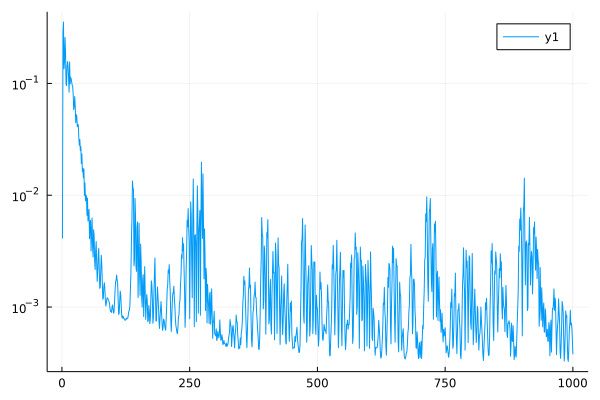

In [47]:
#plot(losses[1:1000],yaxis=:log)

In [79]:
#writedlm("loss_fourth_interval.txt",losses[1:1000])

1004

0.00019985963489763404

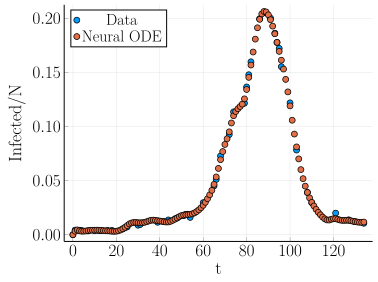

false

In [39]:
callback(result_neuralode8.u,loss_neuralode(result_neuralode8.u)...;doplot=true)

In [41]:
t8 = 149.0
prob_neuralode = NeuralODE(dudt2, (0.0,t8), Tsit5(), saveat = 0:t8)
result_neuralode9 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode8.u,
                                           ADAM(), maxiters = 1000,
                                           cb = callback)

1

0.0007410462368785942

2

2.0011844406495407

3

0.06373124465038003

4

0.14541386301123582

5

0.15613035362172384

6

0.18597983727550343

7

0.19649242139458079

8

0.18570957619674347

9

0.17837792203616118

10

0.18277154461549305

11

0.18952080077072284

12

0.19655897944182915

13

0.19918703551703656

14

0.19444769791362945

15

0.18120150170616817

16

0.17619688439297576

17

0.1744070708387609

18

0.16399958653232008

19

0.1650754841998378

20

0.16109345054742985

21

0.15404204769027224

22

0.15391499061175717

23

0.14939850618484227

24

0.14685360625483285

25

0.14574484904843157

26

0.1412565877726343

27

0.13895868325773772

28

0.1346399799719581

29

0.13249011344918393

30

0.1298262332430092

31

0.1276434608663396

32

0.12493668164631389

33

0.1252971639793171

34

0.1237598368157756

35

0.12367532450238389

36

0.12561988032650023

37

0.12360734619632747

38

0.12343939192996622

39

0.1249075082341349

40

0.12290688522347956

41

0.12192891488300876

42

0.1215116439851432

43

0.12140940935125835

44

0.12115701619115422

45

0.12030750187320632

46

0.1201446761241588

47

0.12017224526450694

48

0.11914136218593217

49

0.11833823471762367

50

0.1179897153891819

51

0.11751168858339466

52

0.11731069881228974

53

0.11692225082922679

54

0.11773696725680965

55

0.1184479801987984

56

0.12939437106257953

57

0.11628632636002387

58

0.2026461186278115

59

0.2001463674295858

60

0.24321190735706466

61

0.24473510892192868

62

0.22800460953792787

63

0.20689794725920466

64

0.19218771043227978

65

0.188674572072003

66

0.19415682116660138

67

0.20589386551852618

68

0.21666543239059008

69

0.2202534738423435

70

0.21540053545129934

71

0.2050693675674062

72

0.19433659873405162

73

0.18855623690178186

74

0.18822802476146006

75

0.19181186923259338

76

0.19639110305820284

77

0.19877095779268295

78

0.19722883412223463

79

0.19208822325237218

80

0.18581895658698702

81

0.18027376311875987

82

0.1778885165328709

83

0.18119437283095638

84

0.1835837758766385

85

0.18120130459940828

86

0.17358719644755266

87

0.17123896762173163

88

0.17216599377957706

89

0.17152011465835268

90

0.16649287276081245

91

0.16385176260491763

92

0.16370309104591543

93

0.16214910691146572

94

0.15542513375461833

95

0.15393700461942694

96

0.15334546192909587

97

0.15057952684843334

98

0.14731977112892813

99

0.14590380603940958

100

0.14430593369858555

101

0.1405304581417801

102

0.13710958549000218

103

0.13500051197335364

104

0.13154876393813547

105

0.12743220994401158

106

0.1258794572875236

107

0.12302422011995459

108

0.12003377867593641

109

0.11818920992344145

110

0.11347615907245377

111

0.11079459453505912

112

0.10771403809682939

113

0.1051731401869999

114

0.10232427406119346

115

0.09877243103342562

116

0.09518557325690656

117

0.09124289895875831

118

0.08807966682602085

119

0.08362067543634871

120

0.08099651370265434

121

0.0765771866294498

122

0.07112191550560157

123

0.06800931547570079

124

0.06215716025351274

125

0.05863818458139579

126

0.05666800123842122

127

0.05122500969186279

128

0.04725245591145264

129

0.04530440168485386

130

0.04190383018716351

131

0.0358375375072101

132

0.032232961258682344

133

0.03171520577755029

134

0.032342305169936206

135

0.036204433094523675

136

0.026120551908591784

137

0.019622665836888577

138

0.016358666419902662

139

0.015065575121061922

140

0.016285307831968337

141

0.023155204581547142

142

0.04258863746831235

143

0.02470443751555543

144

0.013347794479106983

145

0.010571234759044229

146

0.017313858560757463

147

0.0232293497317046

148

0.01015710321935342

149

0.0100173341232004

150

0.019318865845224218

151

0.012167134294444026

152

0.00684170129474016

153

0.007737863670836505

154

0.011001395689347174

155

0.01260609539083222

156

0.006474881478684773

157

0.005051207932182296

158

0.00800150411394704

159

0.00879544834507727

160

0.0077582977334151905

161

0.004584064372170802

162

0.003925224851701864

163

0.0057937964142115985

164

0.007554188850427527

165

0.009036728371101428

166

0.00724242625807545

167

0.005562099371200092

168

0.003983965607329226

169

0.00299777261498779

170

0.0028594551471924387

171

0.0032151420671609554

172

0.003842515661805793

173

0.00388052806222506

174

0.0038272933499870483

175

0.0035598250069208445

176

0.00337781273428757

177

0.003299737519635225

178

0.0031907466373038043

179

0.003117292812840615

180

0.003326274602532939

181

0.0038455736156395503

182

0.004905047439588123

183

0.007433882455037996

184

0.014773440094863154

185

0.022974612178525505

186

0.03978911224626754

187

0.005901341067504661

188

0.00663580124883244

189

0.030131596259527983

190

0.010255072835603634

191

0.0022622185677277588

192

0.010085563222457471

193

0.018402050513036117

194

0.019281850809995928

195

0.0029161672085442317

196

0.008836747913740126

197

0.023402067167068427

198

0.004488170072274408

199

0.007256068474184977

200

0.0188550140238543

201

0.003479295227081764

202

0.008620434751954262

203

0.01769014773502401

204

0.0026287225451264292

205

0.011034029337909446

206

0.018531298761113025

207

0.002102081499956895

208

0.016806069652274967

209

0.020456357610562477

210

0.0030940653103125244

211

0.025586366118027396

212

0.014789973183038235

213

0.007437938490900802

214

0.025601120576139842

215

0.005979736462902293

216

0.011082939931426951

217

0.013624930946842868

218

0.0022237520966425692

219

0.010765369964575184

220

0.0030887136537002613

221

0.006685189681670938

222

0.006808777321947466

223

0.002944910138592599

224

0.008499183586171471

225

0.0030553207317141748

226

0.005358902115947446

227

0.004906557008814679

228

0.002531095786265864

229

0.005559371312828547

230

0.00218930761209658

231

0.00461955959533052

232

0.0034904645243036794

233

0.002807233214589501

234

0.00455753040242385

235

0.001992309869547248

236

0.003857942610725009

237

0.0026531290724201317

238

0.0026019923164598002

239

0.0033806268563983505

240

0.0019081000968536451

241

0.0030976864156856835

242

0.0022014621710651746

243

0.002357128429438693

244

0.002718573231948245

245

0.001823512647986982

246

0.0025733019878910863

247

0.0021974624800087934

248

0.001861293653097128

249

0.002261299726675107

250

0.001737901643437552

251

0.0021736202433549163

252

0.0020318308865278595

253

0.001763153571756413

254

0.002151810094023348

255

0.0017092941061309923

256

0.0018301021411898178

257

0.0019029750432223772

258

0.0015978428578633072

259

0.0018882679828791627

260

0.001755599758668682

261

0.0016221369084245814

262

0.0018347227347005372

263

0.0015583422420074934

264

0.0015940890082182045

265

0.0016478597386098191

266

0.0014847640726207225

267

0.001600762544651097

268

0.0015604091015722378

269

0.00143197292398928

270

0.00152906532728063

271

0.0014738739298942385

272

0.0013754460540043758

273

0.0014955385430249692

274

0.001468699529003233

275

0.001316695624600627

276

0.0013683943605733938

277

0.0013680865258317138

278

0.0012698014994662237

279

0.0013115944989384233

280

0.001324332558739188

281

0.001239530565003162

282

0.0012113180883168353

283

0.0012548767976856656

284

0.001206175339511294

285

0.0011620928228517039

286

0.0012102572857318528

287

0.0011858764335054381

288

0.0011545025228141827

289

0.0011642380540479924

290

0.001159538770387809

291

0.001122416367077071

292

0.001135880627306637

293

0.0011394870471731777

294

0.00110095845042361

295

0.0010850738347667466

296

0.001084148845087542

297

0.0010790741730076043

298

0.0010756902109680191

299

0.0010770262297763494

300

0.0010528948852428738

301

0.001060539206523512

302

0.0010442931826683806

303

0.0010347974808549922

304

0.001036081255758489

305

0.0010270274152530527

306

0.0010473441240133284

307

0.0010118343997664917

308

0.0009976222259681776

309

0.0010110629189019468

310

0.0010345422311513648

311

0.0010488088329372082

312

0.0010163553804143925

313

0.0009947642878779515

314

0.0010240929991679657

315

0.0010156766221040571

316

0.0009881439784316388

317

0.0010104117393658835

318

0.0010326436362500455

319

0.0009952742750951192

320

0.0009846433540917215

321

0.0009745187607528858

322

0.0009627308188939524

323

0.0009674676059168986

324

0.0009565089207024789

325

0.000950483738393543

326

0.0009649606368538141

327

0.0009597695731498648

328

0.0009370994149173653

329

0.0009502534024405903

330

0.0009635803234787994

331

0.000972027442405153

332

0.0009587847716099971

333

0.0009352726188254702

334

0.0009411371547438743

335

0.0009415585817438228

336

0.0009284356688979821

337

0.0009282257872132348

338

0.0009680578498953195

339

0.0010067853975125587

340

0.0009975659234012933

341

0.0009409132832459354

342

0.0009094801149979258

343

0.0009091701011289676

344

0.0009160038429605564

345

0.0009030917805279514

346

0.0009008058149523144

347

0.0009091420144032644

348

0.000914452892116858

349

0.0009056886252537787

350

0.0008945376577596067

351

0.000906229819604836

352

0.0008963171702076125

353

0.000895712382242293

354

0.0008731203402805147

355

0.0008823641043393176

356

0.0008699792144845513

357

0.0008712122239975703

358

0.0008845818346268071

359

0.0009341491320460928

360

0.000986157330262701

361

0.0009854071839565332

362

0.0009198077520573546

363

0.000884930422444396

364

0.0008585147408327507

365

0.00085196836246788

366

0.0008641109108675637

367

0.0008570884617511451

368

0.0008502288978419015

369

0.0008648256112601956

370

0.0008517667662156003

371

0.0008534009296679621

372

0.0008785383855319444

373

0.0008846170515356708

374

0.0008480905637265783

375

0.0008349076162894287

376

0.0008417701740523459

377

0.0008603470078443951

378

0.0008874946958140833

379

0.0008982338520325216

380

0.0008983627641531407

381

0.0009147153722561282

382

0.0008921480567691744

383

0.0008716280535512087

384

0.0008270584417513575

385

0.0008194666026128469

386

0.0008631392808750321

387

0.0009037908141551291

388

0.00092367568451833

389

0.0009323179097656927

390

0.0009640825088204267

391

0.0009441534611622516

392

0.000892820653943302

393

0.0008457077856530787

394

0.0008179915310375196

395

0.0008099334210065031

396

0.0008348464663755926

397

0.0009035375906560045

398

0.0010340585705050562

399

0.0011808355777238786

400

0.0012627446876809323

401

0.0014017228179361938

402

0.0014339367764097998

403

0.0017745580198119345

404

0.001998218938981009

405

0.0028963065016093053

406

0.0031839582437115013

407

0.0061071232656735195

408

0.008224291349155855

409

0.019480435565394295

410

0.015123299955910505

411

0.023426265544555947

412

0.0057159981998293734

413

0.0010559596792905613

414

0.0036083084122894168

415

0.006591129398755561

416

0.01178418262395345

417

0.007048836860871445

418

0.004878458875221344

419

0.0010123222762336028

420

0.002695041999942252

421

0.007334346137680419

422

0.0047558512580965825

423

0.0023546312578891417

424

0.0010911733501413163

425

0.0037688137079226916

426

0.006671558517998167

427

0.002188467491789491

428

0.0010734354657626615

429

0.002949806651910901

430

0.0019792843796181472

431

0.0009516144133629299

432

0.0012245084346953674

433

0.0016660731246846614

434

0.0014091463611201444

435

0.0008816944736658573

436

0.0013965300583000423

437

0.0017374956450845287

438

0.0009583606804960316

439

0.0010741560975855873

440

0.0015996608697306694

441

0.0010823850047446651

442

0.0009042660119942923

443

0.0013258017253800043

444

0.0011382340294815562

445

0.0008614468628455099

446

0.0009644220894789146

447

0.0011124971258554633

448

0.001074983493739021

449

0.0008500863891848039

450

0.0009212608447004693

451

0.0011315089908288667

452

0.0009488019558467529

453

0.0008240561057515041

454

0.0008823394124318315

455

0.0009159570916037068

456

0.0008638281873879922

457

0.0008109804068724219

458

0.0008691655281022097

459

0.0009121421076247536

460

0.0008403381562609416

461

0.0008078810456924412

462

0.0008346444280113167

463

0.0008382539798464624

464

0.000804827617084313

465

0.0007879205237990226

466

0.0008015535673426793

467

0.0008049761337503425

468

0.0007934511057767488

469

0.000784690075343537

470

0.0007967460963889224

471

0.0008016077554715762

472

0.0008026002249139657

473

0.0007839679684389346

474

0.0007941167557497059

475

0.000805467976538695

476

0.0007765168926506018

477

0.0007914257280436057

478

0.0008096121940281429

479

0.0008134247886539619

480

0.0007829093003671536

481

0.0007647031552522278

482

0.000782821124282416

483

0.0007841635093151467

484

0.0007729936973311578

485

0.0007846513134107377

486

0.0008152909554459969

487

0.0008294694547961247

488

0.0007833496909325417

489

0.0007642473865368122

490

0.0008231223685829891

491

0.0009315057342610224

492

0.0008829374557176854

493

0.0008177305946287064

494

0.0007617465590481955

495

0.000779736025409106

496

0.0008437276434086326

497

0.000868730094327224

498

0.0008907893564832221

499

0.0008066161808314091

500

0.0007493581508901778

501

0.0007739449635243989

502

0.0008853840192148132

503

0.0010174537014722522

504

0.0009269606895401672

505

0.0008066301452904416

506

0.000755414857532911

507

0.0008617898977593392

508

0.001047257532051005

509

0.0010095724647544064

510

0.0009465916996231548

511

0.0008125958399436606

512

0.0007433065062296892

513

0.00075164656448454

514

0.0007927999818370492

515

0.0008514915618125122

516

0.0008524502026927199

517

0.0008358691708984689

518

0.0007785234704528668

519

0.0007471355947435877

520

0.000735050005529609

521

0.00078791645332029

522

0.0008355108732187117

523

0.0008589512732193156

524

0.0008693942294677608

525

0.0008240457747181072

526

0.0007592113962349106

527

0.0007409215551097751

528

0.0007378940116887771

529

0.0007259102339402906

530

0.0007362418122998336

531

0.0007255649037179086

532

0.0007275722480188806

533

0.0007345922512506135

534

0.0007507170175368093

535

0.0007458670370444389

536

0.0007203303301571072

537

0.0007305269259126274

538

0.0007290212179121451

539

0.0007229977931602868

540

0.0007194848703956797

541

0.000749319595915566

542

0.0007792512978105049

543

0.0008102749638611937

544

0.0007892914171385517

545

0.0007694823566173543

546

0.0007464152709875098

547

0.0007427369318547684

548

0.0007642996138433285

549

0.0008250504105442884

550

0.0008850965612807642

551

0.000997660319734151

552

0.0010189953407399093

553

0.0011735827346563883

554

0.0011701097931188318

555

0.0013986849308696304

556

0.0013791872904031376

557

0.0016826624032687295

558

0.0016200706238106693

559

0.002245652794619187

560

0.002219165471634906

561

0.003108175169267348

562

0.002681047216826006

563

0.0037615816741576637

564

0.003188160756511102

565

0.004607433153742366

566

0.003965438932927526

567

0.005469219441070721

568

0.003437225090361939

569

0.003091136840993441

570

0.0017134327735144057

571

0.001069665147935602

572

0.0007388948227006661

573

0.0009330215691480561

574

0.0013447819049063326

575

0.0013014867086154065

576

0.0012291900869120579

577

0.0008621961438196324

578

0.0007471118953215445

579

0.0009727897032135131

580

0.001080105093801396

581

0.0009633557877046158

582

0.0007563500679896493

583

0.0007609674328139567

584

0.0008811539591080162

585

0.0009673700425286686

586

0.0009360443218321163

587

0.0007754935119302391

588

0.0007338792851281377

589

0.0008370709368852807

590

0.0008941907095929487

591

0.0008910169880056268

592

0.0008075639915308514

593

0.0007353078126224562

594

0.0007228965790459761

595

0.0007595946809281803

596

0.0008414336095160345

597

0.0009119372264827558

598

0.0009148516058468251

599

0.0008547896672037766

600

0.0008085693847164069

601

0.0007529552478317196

602

0.0007325177810625532

603

0.0007090448876269729

604

0.0007211318347428935

605

0.0007342421162925697

606

0.0007289785815259398

607

0.0007089450618245184

608

0.0007139597531022816

609

0.0006919284751176656

610

0.0006809211236361184

611

0.0006911146772170813

612

0.0006967628167339455

613

0.0007159194766167314

614

0.000708986334371572

615

0.0007061427253495833

616

0.0006885023060859187

617

0.0006919411224391447

618

0.0006882118680625205

619

0.0007068527705046728

620

0.0007043135749647789

621

0.0007079324234524995

622

0.000710472377426509

623

0.0007060066140325743

624

0.0007082852675515715

625

0.0007323259431410152

626

0.0007874672112612659

627

0.000831470294713968

628

0.0008521892132941766

629

0.0008751324448252099

630

0.0009856145271873204

631

0.0011227962619603789

632

0.0015325763025075484

633

0.0018295175529615616

634

0.0029187668096107757

635

0.0033818147430244613

636

0.007310141220218537

637

0.011497137481526263

638

0.03325639502720708

639

0.011266261993712222

640

0.005435201860460054

641

0.0014434753927681737

642

0.0019953764489929276

643

0.0056756341884201

644

0.007025777310474517

645

0.012151098234343079

646

0.00824549422485469

647

0.008205605507271821

648

0.0020068719936148518

649

0.0014706930911598136

650

0.004456287971995661

651

0.0033067243762343827

652

0.0014814865266517588

653

0.0012654793901349867

654

0.003051767693529739

655

0.004220432731458662

656

0.001477530524959011

657

0.001164430704046234

658

0.002967331488861665

659

0.0017499094264674402

660

0.0008498991324639864

661

0.0012458880287749398

662

0.0016114113411443488

663

0.0012984848968546378

664

0.0008286793340059518

665

0.0014598700438704418

666

0.0019214963610217747

667

0.0008516791434569732

668

0.0012960652204131434

669

0.002719520148312844

670

0.0013677473855129836

671

0.0007946780854117941

672

0.0016174800017944623

673

0.0013191105818826192

674

0.0008126179761467905

675

0.0009095676196842726

676

0.0011769109767819591

677

0.0010475140115196726

678

0.0007374241512953646

679

0.0009290978463942097

680

0.0011043003229378563

681

0.0008156476625181376

682

0.0007300703805162486

683

0.0009238201961721458

684

0.0009229542546200559

685

0.0007768263233005314

686

0.000719299448682115

687

0.0007526074267897052

688

0.0007448736667773231

689

0.0007110018936038323

690

0.0007053328252096389

691

0.0007096746092694911

692

0.000724060380939182

693

0.0007002990194081113

694

0.0006973787666774287

695

0.0007170041713576779

696

0.0007035799008052886

697

0.0006826742993595817

698

0.000699447302336228

699

0.0007253123523123987

700

0.0007008602027714989

701

0.000679918451590558

702

0.0006994163925899697

703

0.000750908424102259

704

0.0008006368449227902

705

0.0007109420054771487

706

0.0006954473195639201

707

0.0007761143290652756

708

0.000813309526085924

709

0.0008189573165770286

710

0.0007397055681594273

711

0.0006867223651955102

712

0.0007027034745767732

713

0.0006892193223972449

714

0.0006788993290883764

715

0.0006693917155290317

716

0.0007083768459055878

717

0.0007559689646382902

718

0.0007558361930352048

719

0.0007338281250392659

720

0.0006917369061143909

721

0.0006711179675037998

722

0.0006753479657241754

723

0.000680720995978786

724

0.000690577658732955

725

0.0006902501562237179

726

0.000671525841565284

727

0.0006767519762389048

728

0.0007257804807027162

729

0.00073591835405795

730

0.0006963638942324902

731

0.0006751710414813303

732

0.0006520512636522338

733

0.0006638570620648713

734

0.0006642820691655417

735

0.0006605313861765366

736

0.0006782576494321582

737

0.0006875923115762623

738

0.000691720781551626

739

0.0006824473602167866

740

0.0006783732856797375

741

0.0006641135154364108

742

0.0006556350673906159

743

0.0006529342910341787

744

0.0006480104257652905

745

0.0006540806443340769

746

0.0006418864996532304

747

0.0006466832068182649

748

0.0006511396313888084

749

0.0006413745468875538

750

0.0006530224377873583

751

0.0006641157474320974

752

0.0006909836939349653

753

0.0006901436971364469

754

0.0006881078944084694

755

0.0006645690572137741

756

0.0006532242469803553

757

0.0006400082890104166

758

0.000640260075882886

759

0.0006474255668339004

760

0.0006680133589856047

761

0.0007415820710426846

762

0.0008657324495387396

763

0.0009442844594990772

764

0.0011842268109697675

765

0.0011958509243278103

766

0.0014299205518006116

767

0.001193315163590214

768

0.0011139638549859624

769

0.0008466541454943128

770

0.0006845516998548382

771

0.0006357332307576569

772

0.0006959917890125336

773

0.0008104845087403874

774

0.0009405172598535253

775

0.001180300445364403

776

0.0011532479530100424

777

0.001379057941692178

778

0.001198485265870203

779

0.0013105027241106786

780

0.001031915751777761

781

0.0008307638143790406

782

0.000671936315117109

783

0.0006364444985746877

784

0.0006944232745262348

785

0.000798059211343755

786

0.001035905265448405

787

0.001179776091037193

788

0.0016066788397631814

789

0.0012626000960180154

790

0.0011631747662025776

791

0.0008352759646189352

792

0.0006809561342805156

793

0.0006255995012660688

794

0.0006915138241842045

795

0.0008188706103378013

796

0.000922886865105015

797

0.0010832944468771608

798

0.001016022358272626

799

0.0010876846092402403

800

0.0009366371405534568

801

0.0008931562835945312

802

0.0007992983074461444

803

0.000715672465332691

804

0.000658335282131293

805

0.0006293765589816938

806

0.0006401181316380793

807

0.0006699443041771045

808

0.0007179680744664074

809

0.0008184606940108382

810

0.001033165320576352

811

0.0010702811356789878

812

0.0012783048595370818

813

0.0012274566924578203

814

0.0014574940260447102

815

0.001261911729388028

816

0.0013180882037914416

817

0.0009645210749064707

818

0.0008516481768786933

819

0.0007240237806037293

820

0.0006805668110690988

821

0.0006285476434190246

822

0.0006283185699187915

823

0.0006430638120859238

824

0.0006642578326016967

825

0.000692496500468031

826

0.0007237046976138756

827

0.0007499149618514147

828

0.0007489654474704241

829

0.0007882202020301954

830

0.0008132976807611877

831

0.0008826398880719508

832

0.0008902767110795409

833

0.0010457872498837036

834

0.001095855606752489

835

0.0014450380036836914

836

0.0017139355739867444

837

0.0030071201308685177

838

0.0032964479901822193

839

0.006740324451361015

840

0.009201475320314857

841

0.020495662642969915

842

0.013095549970054117

843

0.01491274374496221

844

0.005661847634716725

845

0.0018979922162989517

846

0.0011407585197240327

847

0.0034049664657997657

848

0.008080927327748202

849

0.006375124522152888

850

0.00788181885766389

851

0.0027220262289107356

852

0.000842163061630775

853

0.0018916080580389729

854

0.0024089261683061295

855

0.0019476740310325022

856

0.0008366615103077498

857

0.0016058719530376547

858

0.0030460283377068036

859

0.0014716547292578227

860

0.0007784558766445065

861

0.001281106081168121

862

0.0014378886278824604

863

0.0013277862466360322

864

0.0007656885151445924

865

0.0010322228208130624

866

0.001679625110705597

867

0.0010913130535371428

868

0.0007078955438341243

869

0.0008658784991953523

870

0.0010353697766590888

871

0.001085126207782708

872

0.0007658529749096501

873

0.0007299519751294678

874

0.0010518978925280213

875

0.0009232202448011944

876

0.0007048245039873601

877

0.0006824723560059582

878

0.000845057478450503

879

0.000989991073616501

880

0.0007436563025834421

881

0.0006421745436584414

882

0.0007068015371683148

883

0.0007612397469351389

884

0.0007427123213105003

885

0.00065074510365038

886

0.0006368614564101243

887

0.000706928206502676

888

0.0007594241920469737

889

0.0008373977073539481

890

0.0007196110710103621

891

0.0006390596975489746

892

0.0006439478538754068

893

0.0007003068515938563

894

0.0008218017620820166

895

0.0007782269830918445

896

0.0006900125962442602

897

0.0006256414576732222

898

0.0006391700875713253

899

0.000648590113822959

900

0.0006305087215069379

901

0.0006198042268113956

902

0.0006454108373549466

903

0.0006900043081636774

904

0.0007167578800697435

905

0.0007035359724576432

906

0.0006911707427393132

907

0.0006461437335177925

908

0.0006043593859993501

909

0.0006246092398143638

910

0.0006625785226958587

911

0.0007061085394012819

912

0.0007156969884033574

913

0.0007556491417877395

914

0.00070145714030754

915

0.0006614651367839398

916

0.0006358612846039828

917

0.0006002877217339822

918

0.0006051198340446266

919

0.0006253996091197883

920

0.0006185192801016687

921

0.0006345482277879664

922

0.0006584484109733344

923

0.0007059935344104018

924

0.0007559237112152074

925

0.000759710919948747

926

0.0008176551067650599

927

0.0007869000598948367

928

0.000779549411369025

929

0.0007189606335036944

930

0.0007219862019266847

931

0.0006678014875943463

932

0.0006260604489478229

933

0.0006097107181790528

934

0.0006099757266035914

935

0.000616954677060052

936

0.0006195738985822964

937

0.0006408708645858468

938

0.0006263027749449919

939

0.0006286594477283417

940

0.0006216453207223444

941

0.0006111452157829094

942

0.0006069854195147274

943

0.0005948095029301815

944

0.0005931855808024446

945

0.0006032868837094364

946

0.0006088045532653508

947

0.0006292032394442566

948

0.0006282110501178357

949

0.0006120617197703677

950

0.0006229913767249283

951

0.0006447403992595477

952

0.0007136281046440691

953

0.0007889346810613943

954

0.0009531511039375014

955

0.0010406570937004104

956

0.0012664352828832175

957

0.0010429429077428434

958

0.0010746150927444132

959

0.0009041778401238359

960

0.0009123345492589612

961

0.0008096339802875225

962

0.0007406446851547428

963

0.0006481824801848363

964

0.0005948784612975233

965

0.0005713284767806171

966

0.000613574371799871

967

0.0007449153020781108

968

0.0008947766945923334

969

0.0013428735325769436

970

0.0014889463316951927

971

0.00252234326741558

972

0.0021627240196095735

973

0.0032461822080274735

974

0.0023864445758336674

975

0.003045716285922899

976

0.0017932713444826743

977

0.0014270726214908745

978

0.0008029326573854729

979

0.000609107675588186

980

0.0006251456486238898

981

0.0007349831480130356

982

0.0008724261012758536

983

0.0008817446987744264

984

0.0009152871223937627

985

0.0008061825677873497

986

0.000751118772246983

987

0.0006464047997108097

988

0.0005968642926539706

989

0.0006561947393421701

990

0.0007209158160072047

991

0.0008745755130966106

992

0.0008920283907200993

993

0.0010581556778992208

994

0.000993884247023768

995

0.0011282029025654842

996

0.0010234161790591476

997

0.0011289065300505682

998

0.0009448864738604688

999

0.0009403367274296917

1000

0.0008381171765991389

1001

0.0005713284767806171

u: 5754-element Vector{Float32}:
  0.14420237
 -0.06166427
 -0.2053251
 -0.1647171
 -0.15391551
  0.065714456
 -0.030247377
 -0.014566894
  0.21872354
 -0.24965431
  0.043981627
  0.14736517
  0.0902921
  ⋮
 -0.18760158
  0.20467184
  0.08487925
 -0.087673746
  0.100454725
  0.1155299
 -0.0038205693
  0.2566197
 -0.013016805
 -0.014406415
 -0.009023641
  0.018666264

In [96]:
#writedlm("loss_fifth_interval.txt",losses[1:1000])

1002

0.0005713284767806171

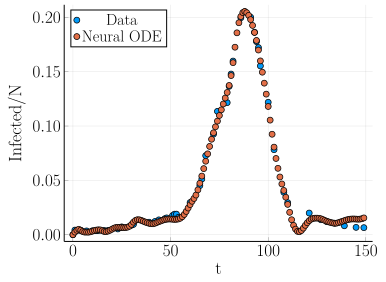

false

In [42]:
callback(result_neuralode9.u,loss_neuralode(result_neuralode9.u)...;doplot=true)

In [44]:
t9 = 170.0
prob_neuralode = NeuralODE(dudt2, (0.0,t9), Tsit5(), saveat = 0:t9)
result_neuralode10 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode9.u,
                                           ADAM(), maxiters = 1000,
                                           cb = callback)

1

0.01993514289755032

2

0.4556195350578002

3

0.2985070333954718

4

0.2254010529741588

5

0.2036957028743873

6

0.21560384415386769

7

0.21881946493013057

8

0.20999015740402505

9

0.21208356595779207

10

0.22931019105009537

11

0.22418643157641868

12

0.20994694289996038

13

0.19876192905521078

14

0.1997820552588422

15

0.20162234611540186

16

0.19885887347009082

17

0.19394707144871257

18

0.19196404233855688

19

0.19035162381540027

20

0.1861853306101189

21

0.1811490806931119

22

0.1803556012945996

23

0.18074436578980976

24

0.17800279143128078

25

0.17347362128040528

26

0.17426398836713422

27

0.16970409197405262

28

0.1689945210167106

29

0.16001298423258373

30

0.2304256787329525

31

0.20399582122281476

32

0.2301012429279478

33

0.22181300836225545

34

0.21794120899800323

35

0.23232642264647124

36

0.23413132240956086

37

0.2352994444693794

38

0.2320693800819997

39

0.22737275646141827

40

0.2246357046295122

41

0.22531250072923398

42

0.22770960592078324

43

0.22887791798100154

44

0.22712229284680382

45

0.2242011597788521

46

0.22164350334861813

47

0.22071202753021096

48

0.2209361866336008

49

0.22154927899414562

50

0.22148507621974067

51

0.22030259168476854

52

0.21822938797747046

53

0.21629577407967515

54

0.21533323684330372

55

0.21483757221239103

56

0.21427956909532955

57

0.2140796831691553

58

0.21373918046793405

59

0.21318073145426153

60

0.21261725839083498

61

0.21184293579197946

62

0.21111328451252534

63

0.21049619563682767

64

0.20988630037301814

65

0.2092804378860635

66

0.20856432635962097

67

0.20779617100692985

68

0.20694597342426174

69

0.2060518388096509

70

0.20483378668308444

71

0.20354713129428456

72

0.2022605742845747

73

0.20065103920768704

74

0.19862462791769903

75

0.1964431290036197

76

0.19404376655071143

77

0.1912913406801916

78

0.18804973140508738

79

0.18415745524188581

80

0.17953614185907998

81

0.17502857283269285

82

0.17226883161028872

83

0.1733254510576302

84

0.18106457634997242

85

0.18138565279172006

86

0.16962552129943112

87

0.17321299946861493

88

0.17238751643841796

89

0.1701157022039555

90

0.1720906974730538

91

0.17313743853128757

92

0.1702224362058628

93

0.16748642006905026

94

0.1671214649308895

95

0.16530071652484016

96

0.16463392958738068

97

0.16687546446595677

98

0.1644483299167669

99

0.16645096085895272

100

0.16202775915788833

101

0.16286330312952937

102

0.16108904358278225

103

0.16042841391189872

104

0.1612647337577979

105

0.15917197578462533

106

0.15876944157445208

107

0.15721176844793175

108

0.15679392384589727

109

0.1561430913798792

110

0.1565649542739781

111

0.15507349279591492

112

0.15515359941784662

113

0.15492303773116947

114

0.15395175711151587

115

0.15354103729530183

116

0.15383092322917385

117

0.1535917775394084

118

0.1531829899454802

119

0.15385002341663173

120

0.15367884856461322

121

0.15270776735392688

122

0.1551075512972677

123

0.15944781450971568

124

0.15644344725077047

125

0.1637488345911745

126

0.17360747109692698

127

0.18102231951781067

128

0.16357251148007548

129

0.16324533983780573

130

0.17074634277820688

131

0.16312350178234697

132

0.1753649971483216

133

0.17690016693865962

134

0.16534852837521632

135

0.15702666433105184

136

0.1896929612117101

137

0.17779193183026523

138

0.21144673843089437

139

0.21474674039843056

140

0.20125034587935606

141

0.19160397158051987

142

0.19402630572866725

143

0.20318308855562167

144

0.20930227027301476

145

0.20763021855173974

146

0.20052365286512633

147

0.19415074923170347

148

0.19287828254869668

149

0.1963579159306441

150

0.19964734068668452

151

0.19867676177947555

152

0.19414072833525425

153

0.18962233672899131

154

0.18715956461356162

155

0.1861987512609556

156

0.18440607262223202

157

0.17990855255266017

158

0.1733561014548497

159

0.16719151514605105

160

0.15866512276037298

161

0.15935182447912707

162

0.16244468453869232

163

0.16412947971011915

164

0.1654633314401473

165

0.16276483702942515

166

0.1588633472130312

167

0.15483192828772904

168

0.15485537520575704

169

0.15406106578393997

170

0.15610447649841125

171

0.1577637351037125

172

0.15808425415314922

173

0.15743409926604812

174

0.15631269100534698

175

0.15494674160949204

176

0.15371713083849733

177

0.15352398409898033

178

0.15384492865772306

179

0.15418689709736133

180

0.15398521262767076

181

0.15340757004089256

182

0.1526290273367617

183

0.1521138503777935

184

0.15203583955440456

185

0.15221845654134997

186

0.15250484424963245

187

0.1526434884562484

188

0.1526796876929072

189

0.15242483168546786

190

0.15212695096605702

191

0.15185629693644734

192

0.15166653291297977

193

0.15164148950149622

194

0.1516044039160023

195

0.15153960329502045

196

0.1514638868881022

197

0.15129917532392306

198

0.15114584514654897

199

0.1510289166037572

200

0.1509684758230165

201

0.15092523989549772

202

0.1509664274440547

203

0.1509321263915831

204

0.15092181726408074

205

0.15082541636192764

206

0.1507573849238738

207

0.1506771900279011

208

0.15061982304866398

209

0.150596993551342

210

0.15053384545768939

211

0.15048937504437557

212

0.1504789748961653

213

0.15041086570134468

214

0.150352295734228

215

0.150272209895467

216

0.1502747307896714

217

0.1502397391382158

218

0.15025312587318543

219

0.15021195349888747

220

0.1501662973538428

221

0.15016588838602526

222

0.15010573752099995

223

0.15005475457702047

224

0.1500353315378025

225

0.14999846002401152

226

0.1499303992374738

227

0.14995530911354976

228

0.14988860051746147

229

0.1498537175503437

230

0.1498486604076926

231

0.1497897040185595

232

0.14980026956740297

233

0.14976387959553966

234

0.14970000434981037

235

0.1496925659635429

236

0.14968602673461257

237

0.14964260424020992

238

0.14964863199025474

239

0.14956231374520096

240

0.14957082452556628

241

0.14954453523999675

242

0.1495240323848915

243

0.14946823434540382

244

0.14944392785668886

245

0.14941455401066822

246

0.1494150290509165

247

0.14936359789285197

248

0.14932259459454303

249

0.1493259561088769

250

0.1492761847376795

251

0.14922763074738865

252

0.14920056131617354

253

0.14917452194383202

254

0.14917103611930935

255

0.14912670421272362

256

0.1490917207697639

257

0.1490876798015336

258

0.1490549597930335

259

0.14898564234751327

260

0.14895162996439432

261

0.14893822871655027

262

0.14889709573299392

263

0.1488142183843941

264

0.14882415654781964

265

0.14880456558430538

266

0.1487438155046348

267

0.14868475849783633

268

0.14863673865548202

269

0.1486245546678454

270

0.14856395038547485

271

0.14849966902257947

272

0.1484311924269957

273

0.14841419525953048

274

0.14833507814206254

275

0.1482835334118254

276

0.14823350411916308

277

0.14817373111445592

278

0.14807721506530988

279

0.14801157147726923

280

0.1479673353251283

281

0.1478570087989787

282

0.14778762512115431

283

0.14769543411015879

284

0.1475772544857822

285

0.14751824209296532

286

0.14737960278588666

287

0.14729356459784898

288

0.14715017373619751

289

0.14707135028582452

290

0.14690798047409062

291

0.14678743392122898

292

0.14660232789577704

293

0.14650043478845995

294

0.14630587617081164

295

0.14615939720603335

296

0.14594682958693633

297

0.14568623911106687

298

0.14547965633022525

299

0.14546516172010898

300

0.14646081960406204

301

0.1457360568682041

302

0.1491748199430179

303

0.14519351614474157

304

0.14518690258230502

305

0.14327719709486017

306

0.14264359673687385

307

0.14220118726985836

308

0.14507132254305607

309

0.14948243006755985

310

0.19032034776941842

311

0.19492917473660845

312

0.16890292580645977

313

0.1637558019124079

314

0.23639222713434052

315

0.19349885708254508

316

0.2247677175754962

317

0.23330574820758992

318

0.22412276676766416

319

0.21536052873984374

320

0.22031591964586686

321

0.23128148804342838

322

0.2367159834636404

323

0.23298996410965242

324

0.22526332513612726

325

0.22149878316698202

326

0.22343688459878874

327

0.22592300914916158

328

0.2237443075666235

329

0.21917157482363803

330

0.21687993348110868

331

0.21809738068631937

332

0.2197724218595224

333

0.2189670042669588

334

0.2159730273273156

335

0.21351475186130833

336

0.21315383981541067

337

0.21373958119437225

338

0.21316223889422473

339

0.2109065314853869

340

0.20894005000848728

341

0.20832015816692767

342

0.2084581501426279

343

0.20737872124377812

344

0.20535756473759734

345

0.2038952460219546

346

0.2035793021556148

347

0.20295570724431244

348

0.2011624306248737

349

0.19950232059056575

350

0.19879323380123873

351

0.19809336270050745

352

0.19624808527562984

353

0.19465277006166878

354

0.19356507145314494

355

0.19147225464059842

356

0.18872065277829833

357

0.18669872820542247

358

0.18335898539455164

359

0.17759499342025056

360

0.17136458409783573

361

0.16606620580537576

362

0.20505894257946555

363

0.27254531252948294

364

0.2531009876139442

365

0.19153459358298705

366

0.19818724335599444

367

0.2372893732417567

368

0.21357860397436224

369

0.19713780766039246

370

0.20447964485764278

371

0.21705411838158803

372

0.22217045504626662

373

0.21806319271983296

374

0.20957297100815522

375

0.20366628975503215

376

0.20438091126841557

377

0.20898523237601133

378

0.2108074932840576

379

0.2062665732824254

380

0.19952712829595104

381

0.19595471192409342

382

0.19616498560217693

383

0.1969447153691524

384

0.1947785618949303

385

0.18922233664345942

386

0.18310476795489636

387

0.18117729450378894

388

0.1821622352511884

389

0.17736456153301147

390

0.16954481186393675

391

0.16545838185009365

392

0.16580119338671181

393

0.16422704930844606

394

0.1579848034310403

395

0.1674981651180428

396

0.16583993616246082

397

0.16352995541724147

398

0.1561682897283496

399

0.15754928862435869

400

0.16039234790034212

401

0.1619403793329104

402

0.1614680943001364

403

0.15902946178301447

404

0.15555856703194104

405

0.15391655034266202

406

0.15418982853469101

407

0.15588501405299202

408

0.15545142744289567

409

0.1550495636299843

410

0.1518669287841222

411

0.1522344734100935

412

0.15199186272114282

413

0.15333904313800395

414

0.15197737425610458

415

0.15117432516005433

416

0.1499916002337237

417

0.15027112650117772

418

0.15007254365241082

419

0.14940390707389894

420

0.15009410907971057

421

0.15278093762194592

422

0.14793946617872755

423

0.15654382345929857

424

0.172651391344321

425

0.18392749176132595

426

0.17618412811659906

427

0.17267190765315243

428

0.17681270688578724

429

0.17733906561480836

430

0.16856734571632628

431

0.15315698191833657

432

0.15137806901536313

433

0.15070853562881525

434

0.1879193367224567

435

0.32116916429711856

436

0.297871793732888

437

0.21574701207429356

438

0.19743375385255155

439

0.22576713665983655

440

0.25612020219604437

441

0.2635448108876801

442

0.24783358641738457

443

0.2254147096596471

444

0.21148501457228283

445

0.2118047803399411

446

0.22212707762270584

447

0.2333541661992305

448

0.23825702057218867

449

0.23513424498603552

450

0.22714917635832937

451

0.21936942760750947

452

0.2153355418911169

453

0.21589924584203013

454

0.21938796154905843

455

0.2232350354413297

456

0.22512542615715742

457

0.2242986962018975

458

0.22135535497823466

459

0.21784790457576977

460

0.21536598915821772

461

0.21451886152855695

462

0.21523467080262848

463

0.21659139451604628

464

0.21753823954090717

465

0.2174030398662754

466

0.21614074870950256

467

0.2143876036808428

468

0.2128456084448852

469

0.2120431902861011

470

0.21199875728812204

471

0.21234139686451944

472

0.21254437663175005

473

0.2122183134305192

474

0.21132866022542732

475

0.21017558463500893

476

0.20916336912919048

477

0.2084756154120498

478

0.2081966760550021

479

0.20804198476450336

480

0.20764541693776578

481

0.20691332262232948

482

0.2060165253434013

483

0.20506062887840462

484

0.20431449364676918

485

0.20376449398974408

486

0.2032840665266095

487

0.20276115774916223

488

0.20210962326868015

489

0.20120696312513672

490

0.2004187543437767

491

0.19966229836058472

492

0.19892371468538564

493

0.19800834518564495

494

0.19724275282358478

495

0.19652482377157804

496

0.1956864946228594

497

0.19470837589256404

498

0.19357999655512595

499

0.1921588172885397

500

0.19050891638228126

501

0.18888029358209224

502

0.18747708624915962

503

0.18595326360478615

504

0.1838516781487768

505

0.1813719163146345

506

0.1792075514461348

507

0.17673714451421355

508

0.17414730547197993

509

0.1715328782137816

510

0.1690447637990731

511

0.1668573187221618

512

0.16388285974884512

513

0.1618240604884409

514

0.16067046038535823

515

0.16041809267298693

516

0.160157735475135

517

0.15946196451495748

518

0.15805176188101647

519

0.15613748154708715

520

0.1554299002650582

521

0.15510225087748863

522

0.1546854316130079

523

0.15356689500094234

524

0.1518925760905762

525

0.14995858278287857

526

0.14804735452775414

527

0.1469772460349037

528

0.14627575094058015

529

0.14563705903981564

530

0.14414490495468232

531

0.1419181088894428

532

0.1397140824425281

533

0.13756387139671958

534

0.13510807428811983

535

0.13132117256538792

536

0.12617451489590417

537

0.12022309039143124

538

0.1135721737488252

539

0.10606267921128427

540

0.10354760353265072

541

0.1020567831192605

542

0.13778589041778075

543

0.27945579184204133

544

0.1610394496926846

545

0.1778359610571051

546

0.18526475823222638

547

0.16869998723594595

548

0.19117743658815198

549

0.19865703744549484

550

0.18643147470529847

551

0.1760510386462262

552

0.1782565455128821

553

0.18481717049541496

554

0.1841605638435592

555

0.17312396825841408

556

0.16194729515723907

557

0.1608154084949229

558

0.16440035611081397

559

0.15892387360762653

560

0.15604861414882903

561

0.16422440072604655

562

0.15107119040340528

563

0.15298632842026863

564

0.14891909726642644

565

0.1466927505335084

566

0.15106823219686913

567

0.15149668718954892

568

0.14799314445811457

569

0.1485501419131952

570

0.14927314506255848

571

0.1447230270958323

572

0.14433538526118767

573

0.1452159831751634

574

0.13960551795388748

575

0.14068467433919418

576

0.1364281002025775

577

0.13422370494748603

578

0.1320132497300939

579

0.12954446871943992

580

0.12727450082991953

581

0.12466940546096143

582

0.11969820429862396

583

0.11887846727448735

584

0.11658171264581701

585

0.1151086527165426

586

0.11561349987107464

587

0.15939527024357694

588

0.16205627129269895

589

0.2225752780686352

590

0.14168365602780617

591

0.19074828754911285

592

0.1402381006687284

593

0.13279148003290595

594

0.16905395320127606

595

0.11936139798766282

596

0.14929783069983946

597

0.1464466370008671

598

0.12172119287609467

599

0.1424626972555128

600

0.13398225116050316

601

0.11338499685502468

602

0.12528873638709165

603

0.10445717861601794

604

0.09749022495802973

605

0.10004280673282198

606

0.08392552833959953

607

0.10394938437378927

608

0.09430497625357645

609

0.09451670297022284

610

0.11060894503891669

611

0.11652829291867199

612

0.11277329416121722

613

0.10692120216456594

614

0.09811326464650891

615

0.09711340731058066

616

0.09722694632708244

617

0.09061423254272086

618

0.07417858612324803

619

0.07209540364682603

620

0.07581668057434475

621

0.08043211131696815

622

0.07553672090863406

623

0.06494382360361753

624

0.0603675876160178

625

0.07065266341420463

626

0.05907650601906098

627

0.0651362711078523

628

0.06885698608593974

629

0.054818384846901845

630

0.043352991612820885

631

0.42457165077838954

632

0.2768482159407529

633

0.2397461211254469

634

0.23801807644432985

635

0.23132496911922604

636

0.23177537881349533

637

0.23782234613959094

638

0.2343774327805881

639

0.21193703574540443

640

0.22030063656864113

641

0.19234911472078042

642

0.21694962226305803

643

0.2026826542736247

644

0.20889932063390554

645

0.19562067559703758

646

0.20057582899083987

647

0.19676011474352406

648

0.1985847987482328

649

0.1910453897099461

650

0.19428621312697714

651

0.18904650660601324

652

0.192351178081189

653

0.18373034187548

654

0.18260468873648314

655

0.1799934290077195

656

0.18403231212103077

657

0.1822011295117642

658

0.17834263061399322

659

0.17983601644013678

660

0.17721445122234372

661

0.1779984595955152

662

0.1750378157256757

663

0.17718572468323204

664

0.17387320527881978

665

0.17623777293740675

666

0.17264608407655635

667

0.1748513474987435

668

0.17160891237138312

669

0.17325178622239934

670

0.17056342018252701

671

0.17177610418721867

672

0.17047451955437043

673

0.17107212173759964

674

0.1691762297886212

675

0.16963307063390765

676

0.1679489978034815

677

0.16832065776744756

678

0.1671146710745558

679

0.166917719594818

680

0.16582079777284375

681

0.16519835769097604

682

0.16414885301516904

683

0.16313854847715578

684

0.16236556280290101

685

0.1612112812938988

686

0.16050837887748629

687

0.15960066659682837

688

0.1590264207299804

689

0.15812773254172996

690

0.15768012686454597

691

0.15683055623625586

692

0.15637417477730836

693

0.15588789776750442

694

0.15546909665154313

695

0.15495124427229484

696

0.1545703854790764

697

0.1541102380813234

698

0.1539244417053366

699

0.15366229502041967

700

0.15331874270874044

701

0.15308371280008612

702

0.15294135651728705

703

0.1527635693912059

704

0.15256522505593093

705

0.15236303519627759

706

0.15212998719095047

707

0.15199272907350142

708

0.1519047928721148

709

0.15195957803195942

710

0.15276863551229197

711

0.1534370607749807

712

0.15918191414316404

713

0.1530407039947092

714

0.175470118085859

715

0.21516964383901327

716

0.21966250471569487

717

0.19290839608380184

718

0.21439849424440655

719

0.22619306007104653

720

0.2044143584023024

721

0.19575287987807433

722

0.21009905720701233

723

0.21235015958180836

724

0.19884798355809918

725

0.19368158824516407

726

0.19997047703409485

727

0.2036376183641867

728

0.19851363676413375

729

0.1922557963139773

730

0.19215592746825233

731

0.1958521465058509

732

0.1954136425454185

733

0.19030128556856984

734

0.1867112777527581

735

0.18686143505487401

736

0.1861857112805764

737

0.1801960617963083

738

0.17220276848427424

739

0.16636991191982067

740

0.16351143054105852

741

0.16510960504914196

742

0.1640397733542797

743

0.16297818314690757

744

0.1570694272479973

745

0.15500496889563975

746

0.15374242757586076

747

0.15573731183213424

748

0.15775671416471798

749

0.15893048761636877

750

0.15846938366996335

751

0.15709609357716517

752

0.15547208708141882

753

0.15537122876512863

754

0.1558635591709678

755

0.1563906292412883

756

0.15527411158327806

757

0.15344293364023756

758

0.152348026516449

759

0.15196878271897188

760

0.15235970013876873

761

0.15234176621328246

762

0.15199756092373481

763

0.1515566149078262

764

0.15152913656348008

765

0.1517199180647191

766

0.15211922182897783

767

0.15221717828273507

768

0.15210028160898262

769

0.15174877035513018

770

0.151524680390081

771

0.1513990586030175

772

0.1513613650525446

773

0.15127852661295244

774

0.15112527592878944

775

0.15098853610250632

776

0.15069055469262116

777

0.15064488252108701

778

0.15064392079021788

779

0.1507041429718362

780

0.1507046922078091

781

0.1506383750651986

782

0.1505917724270272

783

0.15054235652298606

784

0.15053051575117798

785

0.1505461461019461

786

0.1505875528549933

787

0.1504465486027986

788

0.15044384466639835

789

0.15034973829339437

790

0.15038121406649577

791

0.15035457265280466

792

0.15025551325461028

793

0.15026980569159026

794

0.15027221777889374

795

0.15016433351469305

796

0.15020439508973266

797

0.1502170842745202

798

0.15013033483076593

799

0.15011981599949867

800

0.15015890266272428

801

0.15006599821723618

802

0.15007942015092748

803

0.15005540473894052

804

0.15000675998856092

805

0.14998289047970254

806

0.1499954812323539

807

0.14997289675544068

808

0.14991568777809436

809

0.14995977750236

810

0.14991531690007326

811

0.14997709484889085

812

0.14992403335184293

813

0.14991257630594598

814

0.1498957571547352

815

0.1498885710856623

816

0.14985636316904305

817

0.14984677507733687

818

0.1498040318626155

819

0.14979930083322002

820

0.14984242284132418

821

0.14977357921149712

822

0.14975940294397483

823

0.14976388365180374

824

0.14980081583384414

825

0.14974523505449472

826

0.14974882685294819

827

0.14974934279290306

828

0.14972447895947763

829

0.14964474833683702

830

0.14964394434415906

831

0.14962688663066048

832

0.14964610963905461

833

0.14958572745107504

834

0.1495720189700855

835

0.1496423324367167

836

0.14958283031906253

837

0.14954417680445767

838

0.14953824251676714

839

0.1495541987938411

840

0.14948899379157882

841

0.1495336643747509

842

0.14945298806728977

843

0.14941595425988347

844

0.14941095182724073

845

0.14941735434138748

846

0.14936703500972184

847

0.14933208651359806

848

0.1493140345725567

849

0.1493274365401555

850

0.14930537558493615

851

0.14926107148343254

852

0.14926105460645786

853

0.14922680150290477

854

0.1491985462727706

855

0.1491259321336523

856

0.14909395248670082

857

0.1490890641985389

858

0.14906001142257355

859

0.1489986016702725

860

0.14898391307188855

861

0.14893844249351168

862

0.1488843679287166

863

0.1488067217487265

864

0.1487733438954405

865

0.14875163893784388

866

0.14868547848114577

867

0.14863903416245047

868

0.1485309598393807

869

0.14851440923132844

870

0.14842977434594082

871

0.14835925962552396

872

0.14827002426979252

873

0.14818021470257164

874

0.148114520279927

875

0.14802282616985762

876

0.14790451880863115

877

0.14780108596509658

878

0.14767982304619146

879

0.1474834469448426

880

0.14735147976883803

881

0.14723299915860658

882

0.14698267607776672

883

0.14680442670130595

884

0.14650971288268239

885

0.1462157311760842

886

0.14580362044432618

887

0.14528493558008002

888

0.14463239947368223

889

0.14367761628649592

890

0.142220663615888

891

0.13967381438812793

892

0.1344607071766282

893

0.12022048473791694

894

0.11271195752183924

895

0.42154726333219233

896

0.28776571838430826

897

0.24296949313789853

898

0.22722228335771397

899

0.23621860460184052

900

0.2470540516119014

901

0.24502766159408507

902

0.23993753904741974

903

0.2348980488169173

904

0.2301502724438093

905

0.2303266387208331

906

0.2347210800070619

907

0.2364239429197904

908

0.2340471948035931

909

0.23045334466101694

910

0.22951781545224628

911

0.23082818881871056

912

0.23200482591362834

913

0.23196035273698323

914

0.23087206820856926

915

0.22964244687353183

916

0.2293156065795295

917

0.23006105633790017

918

0.23064092512808626

919

0.23034925980620538

920

0.22968553833397704

921

0.22920039591163893

922

0.22906790582486355

923

0.22921992955192255

924

0.22940077935293246

925

0.22942560898046077

926

0.22927880381505525

927

0.2290367948374485

928

0.2288120888327634

929

0.22868889344989488

930

0.2286690579901607

931

0.22868644612907144

932

0.2286881015479295

933

0.22859150399631695

934

0.22840740475090585

935

0.22824688929327278

936

0.22811326591192913

937

0.22801587879306695

938

0.22796011224228266

939

0.22787314620772114

940

0.22780690217355115

941

0.22772651893469445

942

0.22761828936761855

943

0.2275566456353086

944

0.22748770759723252

945

0.22742014166016586

946

0.22736789114135428

947

0.22726257076397596

948

0.22718573095881928

949

0.22709712340227994

950

0.22701554972344803

951

0.22694222318138432

952

0.22684484090943824

953

0.226740892938549

954

0.22662868078236167

955

0.2265356663797124

956

0.2264282567553173

957

0.22630936552578548

958

0.22618007317664468

959

0.22609819258018982

960

0.22596155159901976

961

0.2258478056498017

962

0.22580079061136893

963

0.22569222083689167

964

0.22559265781126678

965

0.2254819586592743

966

0.22536116060295283

967

0.22523648687231743

968

0.22510195841735098

969

0.22498754440956242

970

0.2248972415498761

971

0.22478706755493522

972

0.2246830911522892

973

0.2245886509721049

974

0.22448034087596042

975

0.2244110113986032

976

0.22428686216081342

977

0.22414769680355492

978

0.22402871409948996

979

0.22392861518537427

980

0.2238020488999293

981

0.22370608221357596

982

0.22362266312833706

983

0.22353168020868217

984

0.22342663382082353

985

0.22330966002150746

986

0.22317118046056125

987

0.22306669156474287

988

0.22294720174832838

989

0.22277979350654786

990

0.22260513434462065

991

0.22249850939410612

992

0.22233343198535366

993

0.2220795426860434

994

0.22171484638738645

995

0.2215264433763989

996

0.2216621720563682

997

0.22113594290933564

998

0.22083274929967972

999

0.22047272807995713

1000

0.2198066911304932

1001

0.01993514289755032

u: 5754-element Vector{Float32}:
  0.14420237
 -0.06166427
 -0.2053251
 -0.1647171
 -0.15391551
  0.065714456
 -0.030247377
 -0.014566894
  0.21872354
 -0.24965431
  0.043981627
  0.14736517
  0.0902921
  ⋮
 -0.18760158
  0.20467184
  0.08487925
 -0.087673746
  0.100454725
  0.1155299
 -0.0038205693
  0.2566197
 -0.013016805
 -0.014406415
 -0.009023641
  0.018666264

In [92]:
#writedlm("loss_sixth_interval.txt",losses[1:1000])

In [49]:
dat_NODE = readdlm("NeuralODE_covid.txt",',');

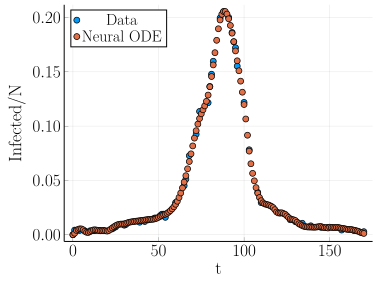

In [50]:
t_local = tsteps
plt = scatter(t_local, ode_data[1:length(t_local)], 
            label = "Data", 
            ylabel="Infected/N",
            xlabel="t",
            legend=:topleft, 
            size=(500,400),
            dpi=1000,
            xtickfont=font(18),
            ytickfont=font(18),
            yguidefontsize=18,
            xguidefontsize=18,
            legendfontsize=16,
            titlefontsize=18)
scatter!(plt, 0:170, dat_NODE, label = "Neural ODE")

In [51]:
savefig("results_sixth_interval.png")